<a href="https://colab.research.google.com/github/Rahulshinde5/Unsupervised-Machine-Learning-Project-/blob/main/Netflix_Movies_and_TV_Shows_Clustering_by_Rahul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Exploratory Data Analysis (EDA) is a crucial step in understanding and extracting insights from a dataset. In the case of the Netflix dataset, several variables offer interesting avenues for exploration, including understanding the types of content available in different countries, analyzing Netflix's focus on TV shows versus movies, and clustering similar content based on text-based features.

To begin, examining the type of content available in different countries can shed light on Netflix's global offerings. By grouping the dataset by the "country" variable and analyzing the count or distribution of movies and TV shows in each country, we can identify regions with a significant presence of specific content types. Visualizations such as bar charts can be employed to highlight countries with notable content preferences, providing valuable insights into regional viewing habits.

Next, it is intriguing to explore whether Netflix has been increasingly focusing on TV shows compared to movies in recent years. Grouping the dataset by the "release_year" variable allows us to calculate the count or percentage of movies and TV shows for each year. Plotting this information over time reveals any significant changes in the proportion of movies versus TV shows. Statistical analysis can also be conducted to determine if there is a significant difference between the two content types over recent years. Such an analysis helps identify shifts in Netflix's content strategy and provides an understanding of the platform's evolving offerings.

Moreover, clustering similar content based on text-based features enables the identification of patterns and similarities among movies and TV shows. Text features such as "title," "director," "cast," and "description" can be leveraged for this purpose. Prior to clustering, preprocessing steps like removing stop words, punctuation, and performing stemming or lemmatization help clean and standardize the text data. Clustering algorithms such as k-means, hierarchical clustering, or DBSCAN can then be applied to group similar content based on these features. Evaluation metrics like the silhouette score aid in assessing the quality of the clusters. Visualizations provide a means to explore the characteristics of the clusters, revealing patterns and associations that exist within the content.

In summary, conducting EDA on the Netflix dataset allows for a comprehensive exploration of the content available on the platform. Analyzing the types of content available in different countries offers insights into regional preferences. Assessing whether Netflix has shifted its focus towards TV shows over movies provides an understanding of the platform's content strategy. Lastly, clustering similar content based on text-based features unveils patterns and similarities, facilitating content recommendation and personalization.

By following these steps, researchers and analysts can uncover valuable insights about the Netflix dataset, contributing to a deeper understanding of the platform's content landscape and user preferences.

# **GitHub Link -**

https://github.com/Rahulshinde5

# **Problem Statement**


The problem at hand is to conduct exploratory data analysis on a Netflix dataset in order to understand the types of content available in different countries, determine if Netflix has been prioritizing TV shows over movies in recent years, and cluster similar content based on text-based features.






# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
import string
!pip install reverse_geocode
import reverse_geocode
import plotly.express as px
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import pickle
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocode: filename=reverse_geocode-1.4.1-py3-none-any.whl size=1637826 sha256=b2e7a48d8977419917a768b9c6e510b1d55821a21cacc36318f35776d2ef8974
  Stored in directory: /root/.cache/pip/wheels/8d/2f/ac/dd0a91b3e7e0aa6e5f77bfbc7f7834aecce4a01cba231ba024
Successfully built reverse_geocode
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.0 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Load Dataset
shared_link = 'https://drive.google.com/file/d/1L_wCGejVYi8GtPY_np68LF6SNDncbQsM/view?usp=sharing'
file_id = shared_link.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
dataset = pd.read_csv(download_url)

### Dataset First View

In [3]:
# Dataset First Look
dataset.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

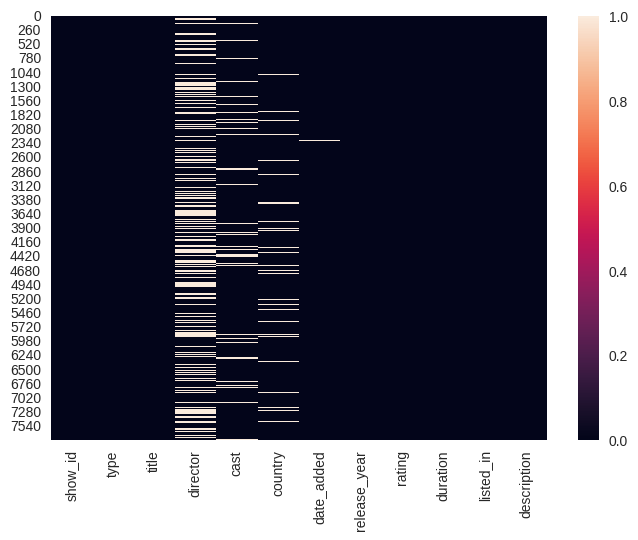

In [8]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=True)

### What did you know about your dataset?

Netflix Movies and TV Shows Clustering dataset, it contains the information of tv shows and movies available on Netflix as of 2019. Netflix Movies and TV Shows Clustering dataset contains 7787 rows, and 12 columns. The dataset have categorical variables, and numerical , It has some null values in the variables director, Cast, Contry, date added, and released year.       

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

---
*  **show_id**: A unique identifier for each movie or TV show in the dataset.
---
*  **type**: Indicates whether the entry is a movie or a TV show.
---
*  **title**: The title of the movie or TV show.
---
*  **director**: The name of the director(s) associated with the content.
---
*  **cast**: The names of the main cast members in the movie or TV show.
---
*  **country**: The country or countries where the content was produced or originated.
---
*  **date_added**: The date when the movie or TV show was added to Netflix.
---
*  **release_year**: The year when the movie or TV show was originally released.
---  
*  **rating**: The content rating assigned to the movie or TV show (e.g., PG,   TV-MA).
---  
*  **duration**: The duration of the movie or TV show (e.g., "1h 30m" for 1 hour  and 30 minutes).
--- 
*  **listed_in**: The categories or genres in which the content is listed.
---
*  **description**: A brief summary or description of the movie or TV show.
---

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is:-",dataset[i].nunique(), ".")

No. of unique values in  show_id is:- 7787 .
No. of unique values in  type is:- 2 .
No. of unique values in  title is:- 7787 .
No. of unique values in  director is:- 4049 .
No. of unique values in  cast is:- 6831 .
No. of unique values in  country is:- 681 .
No. of unique values in  date_added is:- 1565 .
No. of unique values in  release_year is:- 73 .
No. of unique values in  rating is:- 14 .
No. of unique values in  duration is:- 216 .
No. of unique values in  listed_in is:- 492 .
No. of unique values in  description is:- 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Lets copy our dataset for further analysis.
df = dataset.copy()

In [13]:
# Handling the missing values
# Replacing missing values in 'director', 'cast', and 'country' columns with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [14]:
# Replacing missing values in 'rating' column with the mode (most frequent value)
mode_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_rating)

In [15]:
# Drop rows with any remaining missing values
df.dropna(axis=0, inplace=True)

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [17]:
df['date_added'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7777, dtype: datetime64[ns]>

In [18]:
df.isnull()

show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False  False    False       False   
1       False  False  False     False  False    False       False   
2       False  False  False     False  False    False       False   
3       False  False  False     False  False    False       False   
4       False  False  False     False  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
7782    False  False  False     False  False    False       False   
7783    False  False  False     False  False    False       False   
7784    False  False  False     False  False    False       False   
7785    False  False  False     False  False    False       False   
7786    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False     False      False        False  
2            False   False     False      False        False  
3            False   False     False      False        False  
4            False   False     False      False        False  
...            ...     ...       ...        ...          ...  
7782         False   False     False      False        False  
7783         False   False     False      False        False  
7784         False   False     False      False        False  
7785         False   False     False      False        False  
7786         False   False     False      False        False  

[7777 rows x 12 columns]

### What all manipulations have you done and insights you found?

*  The filling of missing values with 'Unknown' in the 'director', 'cast', and 'country' columns allows for a more complete analysis of the dataset without losing records. It ensures that these attributes are accounted for, even if the original data was missing.

*  Filling missing values in the 'rating' column with the mode value ensures that the column is representative of the most frequent rating for the respective movies or TV shows.

*  By dropping rows with missing values, the analysis focuses on complete and reliable data, which is essential for accurate insights.

*  Also date added variable's dtype is converted to datetime for the simplicity of the further analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Countplot:- Count vs Type of Shows

In [19]:
# Chart - 1 visualization code
df.type.value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

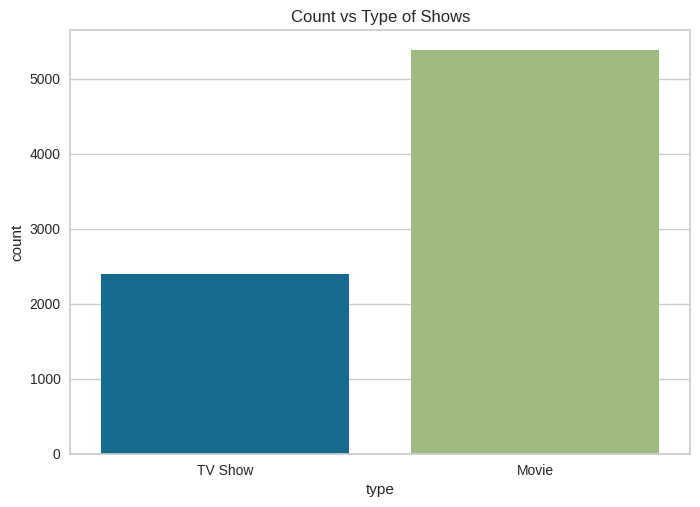

In [20]:
sns.countplot(x='type', data=df)
plt.title('Count vs Type of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

The goal is to represent the count of movies and TV shows, which are two categories of the 'type' variable. A countplot is well-suited for displaying the frequency or count of each category in a categorical variable.

The 'type' variable is categorical, with only two distinct values ('movie' and 'TV show'). A countplot is ideal for categorical variables as it presents a clear visual representation of the count or distribution of each category.

A countplot creates a bar chart, where each category is represented by a bar, and the height of each bar corresponds to the count of that category. This type of chart makes it easy to compare and visualize the differences in counts between categories.

##### 2. What is/are the insight(s) found from the chart?

*  Movies Outnumber TV shows: Based on the heights of the bars in the countplot,  the bar representing movies is taller than the TV Shows bar representing , it indicates that Movies are more abundant in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

*  Content Strategy: The countplot insights help understand the distribution of content types, indicating whether TV shows or movies are more prevalent in the dataset. This information can guide content acquisition and production decisions, allowing businesses to align their content strategy with the preferences and demands of their target audience.

*  User Engagement: By analyzing the count of movies and TV shows, businesses can identify which content type attracts more viewers or generates higher user engagement. This insight can inform the development of personalized recommendations, targeted marketing campaigns, and content curation strategies to enhance user satisfaction and retention.

2. Negative Business Impact:

*  Imbalanced Content Library: If the countplot reveals a significant disparity between the number of movies and TV shows, it might indicate an imbalanced content library. A disproportionate focus on a single content type can limit the diversity of offerings and potentially alienate a portion of the audience seeking variety. This imbalance may lead to negative growth if it does not align with the preferences and demands of the target audience.

*  Missed Opportunities: If the countplot highlights a lower count for a content type that has a growing demand or popularity among the target audience, it may indicate a missed opportunity. Neglecting emerging trends or failing to adapt the content library accordingly can result in negative growth as competitors capitalize on those trends.

#### Pie Chart

In [21]:
# Chart - 2 visualization code
country_group = df['country'].value_counts().head()
print(country_group)

United States     2549
India              923
Unknown            506
United Kingdom     396
Japan              225
Name: country, dtype: int64


In [22]:
# Creating a DataFrame from the grouped data
country_group = pd.DataFrame(country_group).reset_index()
country_group.columns = ['Country', 'Count']

# Creating an interactive pie chart using Plotly Express
fig = px.pie(country_group, values='Count', names='Country', title='Top 5 Countries with Highest Number of Shows')

# Adding interactivity to the chart
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend_title='Country')

fig.show()

##### 1. Why did you pick the specific chart?

This interactive pie chart allows to explore the distribution of shows among the top 5 countries with the highest number of shows. and can hover over the slices to see the country name, count, and percentage, providing a clear visualization of the relative proportions of shows in each country.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the countries that have the highest count of shows within the dataset. By examining the proportions of the pie slices, we can quickly identify which countries dominate in terms of the number of shows available.

Popular Markets: The chart reveals the countries  like United States, India, and UK with a significant presence in the dataset, indicating the popularity and reach of Netflix in those particular markets. This information can be valuable for business decision-making.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

*  Strategic Decision-making: The insights about dominant countries and popular markets can guide strategic decision-making in terms of content acquisition, production, and localization efforts. By understanding the countries with the highest number of shows, businesses can align their strategies to cater to the preferences of those markets, potentially leading to increased viewership and customer satisfaction.

*  Market Expansion Opportunities: The identification of countries with smaller market shares provides insights into potential growth opportunities. By focusing on these markets, businesses can develop targeted strategies to increase their presence, expand their user base, and tap into new revenue streams.

*  Competitor Analysis: The pie chart allows businesses to assess their market share relative to other countries. This insight helps in understanding the competitive landscape and identifying areas where they may need to strengthen their presence or differentiate their offerings to maintain or gain market share.

2.  Negative Business Impact:

*  Overlooking Niche Markets: The pie chart may emphasize countries with the highest number of shows, potentially leading to a concentration of resources and efforts on those markets. This could result in neglecting smaller, niche markets that may have dedicated viewership or untapped potential. Overlooking such markets could limit growth opportunities and negatively impact business performance.

*  Ignoring Local Preferences: While the chart provides insights into the dominant countries, it may not necessarily capture the variations in viewer preferences within each country. Relying solely on overall country counts might lead to a one-size-fits-all approach, disregarding the need for localized content or catering to specific regional tastes. Ignoring local preferences could result in decreased engagement and hinder business growth.

#### Countplot:- Top 10 Countries Producing Movies & TV Shows on Netflix

In [23]:
#  Filter the data for movies and TV shows separately
movie_countries = df[df['type'] == 'Movie']
tv_show_countries = df[df['type'] == 'TV Show']

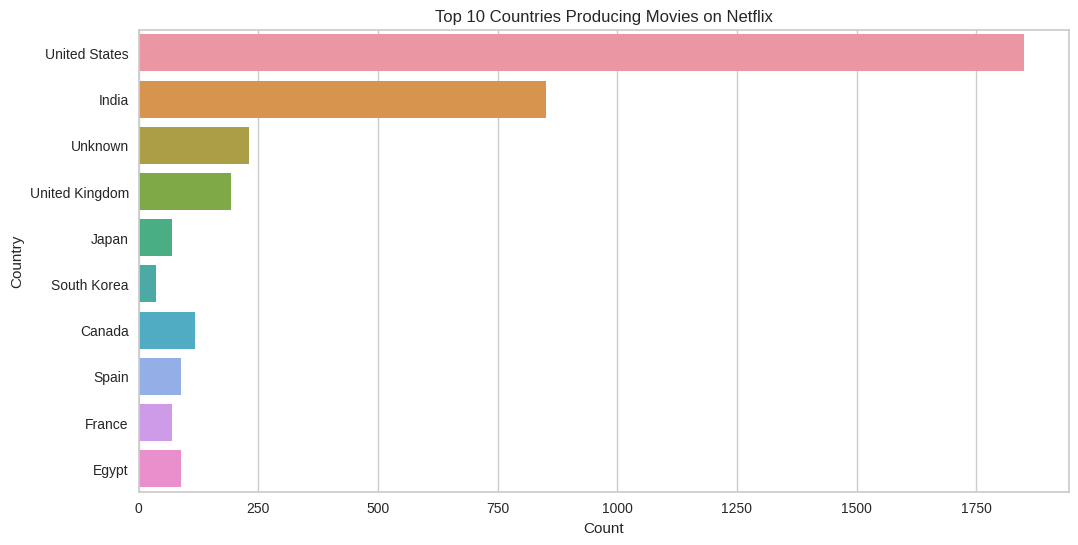

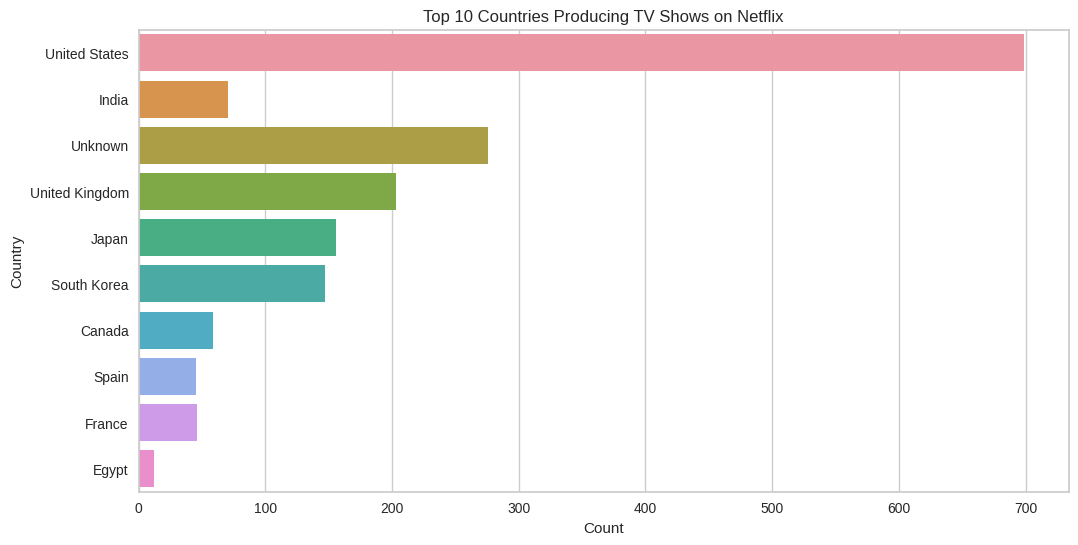

In [24]:
# Plot the count of movies in the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=df['country'].value_counts().index[:10], data=movie_countries)
plt.title('Top 10 Countries Producing Movies on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Plot the count of TV shows in the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(y='country', order=df['country'].value_counts().index[:10], data=tv_show_countries)
plt.title('Top 10 Countries Producing TV Shows on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot function is suitable for this task as it displays the frequency count of each category (in this case, countries) on one axis and the count on the other axis. It provides a clear representation of the distribution of movies and TV shows across different countries.

##### 2. What is/are the insight(s) found from the chart?

Comparison of production: can compare the count of movies and TV shows in the top 10 countries to understand the production patterns.

Dominant countries: By examining the chart,  can identify the countries that have a higher count of movies and TV shows. This information can indicate the countries that are major contributors to the content available on Netflix like US, India, and UK.

Country-specific preferences: The chart can also showcase the content preferences of different countries. You can observe which countries produce and consume more movies or TV shows, potentially highlighting cultural or regional preferences.

Disparities between movies and TV shows: Analyzing the count separately for movies and TV shows can uncover any disparities in production. It may reveal if certain countries have a stronger emphasis on one type of content compared to the other.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted content acquisition: By understanding the production patterns and preferences of different countries, Netflix can strategically acquire content that aligns with the preferences of their target audience. This can help in attracting and retaining subscribers in specific regions.

Localization and regional content: Insights about country-specific preferences can guide Netflix in creating localized and region-specific content. This can lead to increased engagement and viewership in those countries, fostering a positive user experience.

Market expansion: Identifying countries with a higher count of movies and TV shows can provide insights into potential markets for expansion. Netflix can prioritize expanding its presence in countries where there is already a substantial demand for their content.

Regarding insights that may lead to negative growth, it's challenging to provide a specific reason without analyzing the actual data and insights obtained. However, there are a few potential scenarios where negative growth could occur:

Oversaturation of content: If the analysis reveals that certain countries have an oversaturation of movies or TV shows, it may indicate a highly competitive market. In such cases, acquiring additional content in those markets may lead to increased competition and reduced market share for Netflix.

Cultural mismatch: If the analysis shows that Netflix is not aligning its content offerings with the preferences of specific countries, it may result in lower engagement and reduced growth in those markets. It's crucial for Netflix to tailor their content strategy to fit the cultural preferences of their target audience in each country.

Limited growth opportunities: If the analysis indicates a lack of growth potential in certain countries or regions, where the count of movies and TV shows is consistently low, it may result in limited opportunities for expansion and lower overall business growth.

#### Bar Plot:- Distribution of Ratings for Netflix Shows

In [25]:
# Grouping the data by 'rating' and calculating the count
rating_counts = df['rating'].value_counts()
rating_counts

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

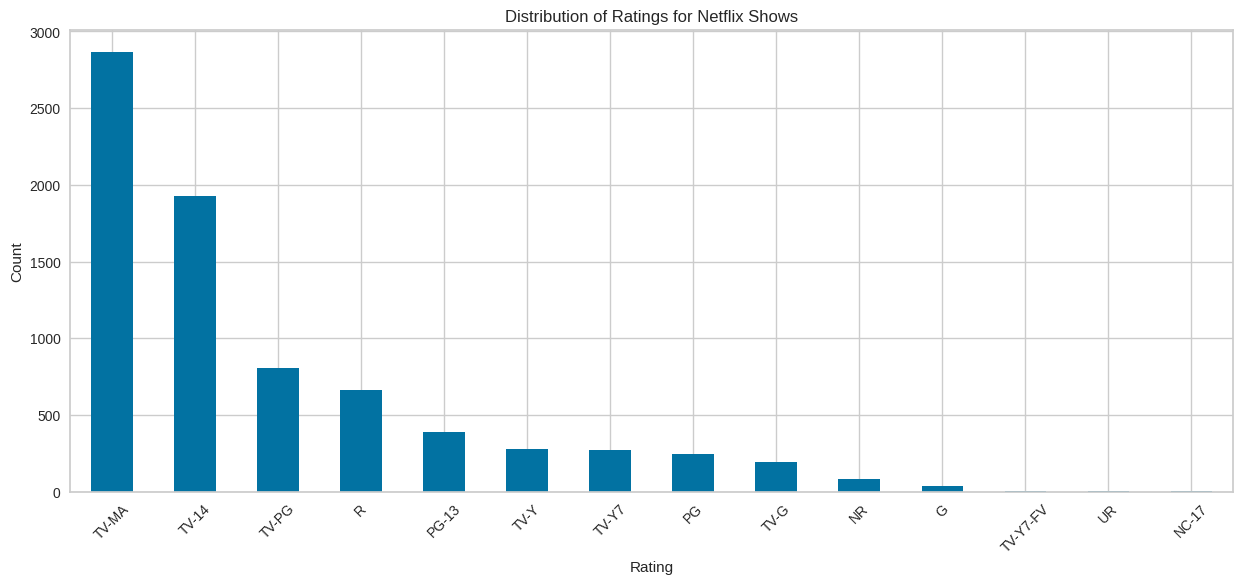

In [26]:
# Creating a bar plot to visualize the rating distribution
plt.figure(figsize=(15, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Netflix Shows')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Categorical Data: The "rating" variable represents categorical data, where each rating category is distinct and non-numeric (e.g., "TV-PG", "TV-MA"). Bar plots are commonly used to visualize the distribution of categorical variables.

Count Representation: The focus is on understanding the count or frequency of each rating category. A bar plot effectively displays the count on the y-axis, allowing for easy comparison and identification of the most common rating categories.

Comparison of Categories: Bar plots allow for a visual comparison between different categories. It helps identify the rating categories that have a higher or lower count in a clear and intuitive manner.

Simplicity and Clarity: Bar plots are simple and easy to interpret, making them suitable for presenting the distribution of categorical variables succinctly.

##### 2. What is/are the insight(s) found from the chart?

Most Common Ratings: The bar plot  shows the count of shows for each rating category. From the chart, can identify the rating categories that have the highest bars like TV-MA, TV-PG, indicating the most common ratings on Netflix. For example, we observe that "TV-MA" (mature audience) or "TV-14" (suitable for viewers aged 14 and above) are the most prevalent ratings.

Dominant Audience: By examining the distribution, can infer the target audience for Netflix shows. The majority of shows fall into higher-rated categories like "TV-MA" and "TV-14" (restricted), it suggests that Netflix has a significant focus on content for mature audiences.  lower-rated categories like "TV-G" (general audience) or "PG" (parental guidance suggested) have higher counts, it indicates a focus on family-friendly or all-age content.

Imbalance in Ratings: The chart  reveal an imbalance in the distribution of ratings. For instance, we  notice that a particular rating category has a significantly higher count compared to others, indicating a preference for content with that specific rating. This provide insights into the content strategy of Netflix and the types of shows that are more prevalent.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Content Strategy: Understanding the most common ratings and the dominant audience can help Netflix fine-tune its content strategy. By aligning their offerings with the preferences of their target audience, Netflix can potentially attract and retain subscribers who appreciate content tailored to their interests.

Improved Content Acquisition: Insight into the distribution of ratings can guide decisions related to content acquisition and production. By identifying the rating categories that have higher counts, Netflix can prioritize acquiring or producing content in those categories to cater to viewer demand.

Personalized Recommendations: The insights gained from analyzing ratings can contribute to refining Netflix's recommendation algorithms. By considering a user's viewing history and preferences, as well as the overall distribution of ratings, Netflix can deliver more accurate and personalized recommendations to its subscribers, enhancing their viewing experience and increasing engagement.

Negative Growth Potential:

Limited Audience Reach: If the analysis reveals a heavy concentration of higher-rated categories (such as "TV-MA" or "R"), there may be a risk of limiting the potential audience reach. This could result in excluding viewers who prefer content with lower ratings, potentially leading to a narrower customer base.

Regulatory Constraints: An overemphasis on content with specific ratings, particularly those that cater to mature audiences, may expose Netflix to regulatory challenges or restrictions in certain regions. This could affect the availability and distribution of content, potentially impacting the company's growth and expansion plans.

Inadequate Content Diversity: If the analysis indicates a lack of content in certain rating categories or genres, it could result in limited diversity within Netflix's library. This may lead to a less inclusive platform, potentially alienating viewers who seek a broader range of content.

#### Bar Plot:- Top 20 Release Years of Netflix Content

In [27]:
# Chart - 5 visualization code
# Grouping the data by 'release_year' and calculating the count
year_counts = df['release_year'].value_counts().head(20)

# Sorting the years in ascending order
year_counts = year_counts.sort_index()

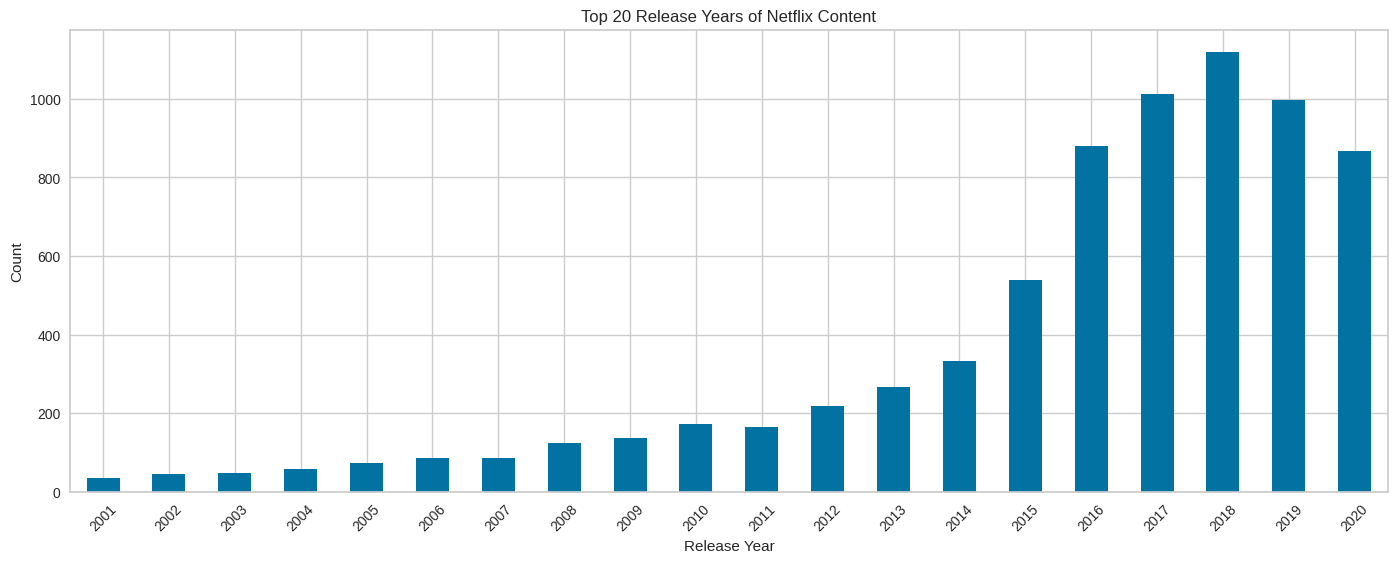

In [28]:
# Creating a bar plot to visualize the release year distribution
plt.figure(figsize=(17, 6))
year_counts.plot(kind='bar')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 20 Release Years of Netflix Content')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are simple and easy to interpret, making them suitable for presenting the distribution of categorical variables succinctly. The clear and straightforward representation of the counts for each year allows viewers to quickly grasp the relative popularity or volume of content released in different years.

##### 2. What is/are the insight(s) found from the chart?

*  Popularity of Certain Years: The bar plot show the count of content released in each year. By examining the chart, can identify the years with the highest bars, like 2018, 2017 indicating the years when Netflix released a significant amount of content. This insight can help identify the years that were particularly popular for content production or acquisition.

*  Growth Trends: The distribution of content releases over time can reveal growth trends in Netflix's library. The chart shows an increasing trend in content releases over the years, it suggests that Netflix has been expanding its content library consistently.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

*  Content Planning and Acquisition: Understanding the years with the highest count of content releases can inform content planning and acquisition strategies. By focusing on the years that have been popular in terms of content, Netflix can make data-driven decisions on acquiring content licenses or producing original shows for those specific years. This can help ensure a strong content lineup that aligns with viewer preferences, potentially attracting and retaining subscribers.

*  Trend Identification and Capitalization: Analyzing growth trends and identifying popular years can help Netflix identify patterns and capitalize on emerging content trends. By understanding which years experienced significant growth, Netflix can anticipate viewer demand, invest in relevant genres or themes, and stay ahead of competitors.

*  Strategic Release Planning: Insights into seasonal or cyclical patterns in content releases can assist in strategic release planning. Netflix can strategically time the release of certain shows or movies to coincide with specific seasons, holidays, or events when viewer engagement and demand are typically higher. This can lead to increased viewership and customer satisfaction.

2. Negative Growth Potential:

*  Overreliance on Recent Years: If the analysis shows a heavy focus on recent years in the top 20, there may be a risk of neglecting content from earlier years. This could result in a lack of diversity in the content library and limited availability of classic or nostalgic content, potentially alienating viewers who prefer older or timeless shows and movies.

*  Content Quality and Diversity: While analyzing the count of content releases, it's important to consider the quality and diversity of the content. Relying solely on the count of releases without considering factors like viewer reception, critical acclaim, or genre diversity may result in a content library that lacks depth and variety. This could potentially lead to negative growth if the content fails to meet the diverse preferences of subscribers.

*  Cyclical Patterns and Seasonal Fluctuations: Depending on the business model and revenue generation strategies, cyclical patterns or seasonal fluctuations in content releases may pose challenges. If the majority of content is concentrated in specific periods, there may be revenue disparities throughout the year. For example, if there are significant spikes during certain seasons but lulls in other periods, it could affect subscriber retention and revenue stability.


#### Countplot:- Top 20 Genres on Netflix

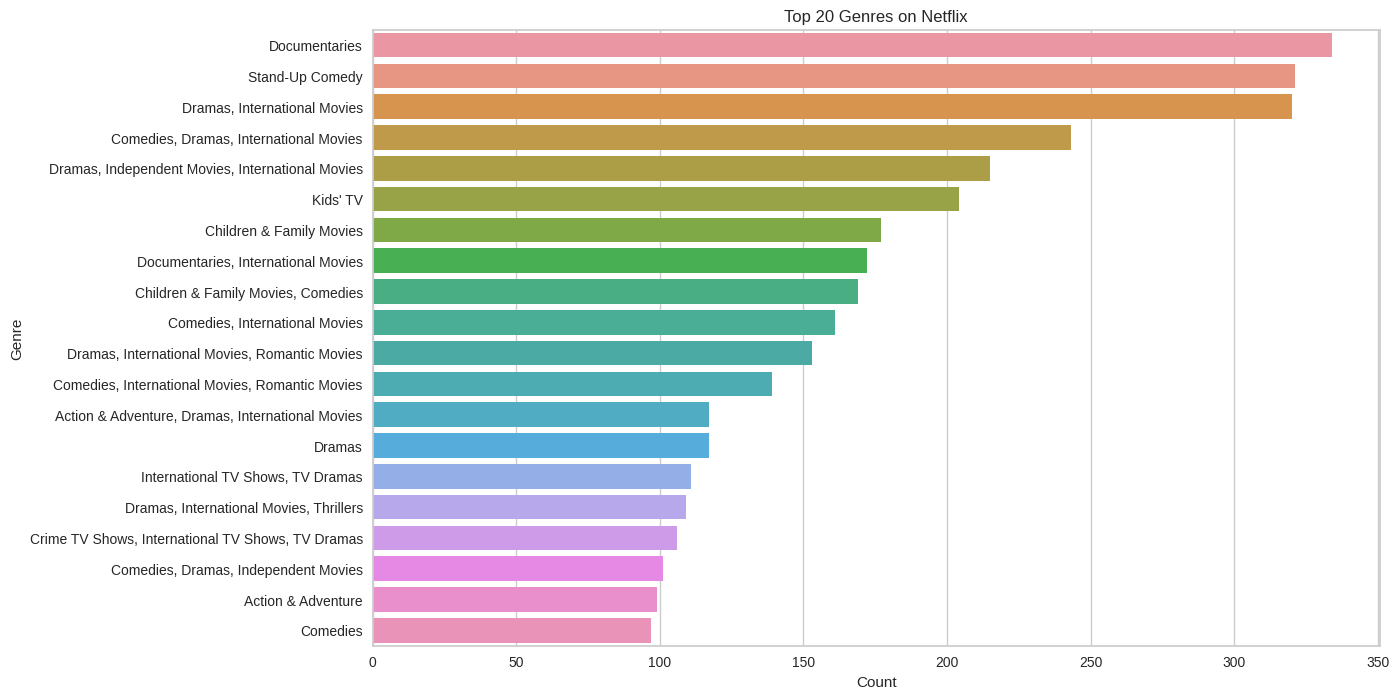

In [29]:
# Chart - 6 visualization code

plt.figure(figsize=(13, 8))
sns.countplot(y='listed_in', order=df['listed_in'].value_counts().index[0:20], data=df)
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal orientation is preferred when dealing with long category labels, as it allows for better readability and avoids label overlap. This is especially important when visualizing a larger number of categories, such as the top 20 genres in this case.
By ordering the bars in descending order based on their counts, we highlight the most popular genres in Netflix shows. This makes it easier to identify the genres that have the highest representation in the dataset.

##### 2. What is/are the insight(s) found from the chart?

By examining the chart, can identify the genres with the highest bars, i.e.,Documentries, Stand up comedies, dramas, independent and international movies. indicating the most popular genres on Netflix. This insight can help understand the preferences of Netflix viewers and guide decisions related to content acquisition and production. It  indicate the genres that have a higher likelihood of attracting and retaining subscribers.
Also the distribution of genres can provide insights into the diversity of content on Netflix. It indicates that Netflix offers a diverse selection of shows across various genres. This diversity can attract a broader audience with different interests and preferences.
By analyzing the chart, we can  identify genres that have been gaining popularity or experiencing a surge in content releases those genres are comedies ,dramas, Dpcumentries. This insight can help Netflix stay up-to-date with current trends and make informed decisions regarding content acquisition and production to cater to viewer demand.
The visualization  reveal niche genres that have a dedicated following or a smaller but engaged audience. Understanding the presence and popularity of these niche genres can help Netflix curate specialized content and target specific viewer segments, potentially fostering a loyal and engaged subscriber base.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

*  Content Acquisition and Production: Understanding the popular genres can guide content acquisition and production strategies. By focusing on genres with high viewer demand, Netflix can prioritize acquiring licenses or producing original content in those genres. This can result in a stronger content lineup that resonates with subscribers, attracting new viewers and retaining existing ones.

*  Audience Segmentation: Analyzing genre diversity and identifying niche genres can help in audience segmentation. Netflix can target specific viewer segments by curating specialized content tailored to their interests. This personalized approach can increase viewer satisfaction, engagement, and ultimately lead to positive business impact.

*  Trend Identification and Capitalization: Recognizing trending genres can enable Netflix to capitalize on emerging content trends. By staying updated with the preferences and interests of viewers, Netflix can strategically invest in or acquire content in popular genres. This can help attract a wider audience, generate buzz, and enhance customer satisfaction.

2. Negative Growth Potential:

*  Genre Overemphasis: Overemphasizing a few dominant genres at the expense of other genres may result in a limited content offering. This can alienate viewers who have diverse genre preferences and limit the potential for growth among untapped segments. Neglecting less popular genres entirely may lead to a loss of subscribers or missed opportunities for audience expansion.

*  Failure to Cater to Niche Audiences: While niche genres may have a smaller audience, neglecting them entirely can result in missed opportunities to cater to specific viewer interests. Failing to offer content for niche audiences can lead to negative growth if Netflix loses potential subscribers who have a strong affinity for those genres.

*  Ignoring Genre Evolution: Genres and viewer preferences can evolve over time. If Netflix solely relies on historical genre data without considering evolving trends, there is a risk of stagnation and failure to adapt to changing viewer demands. Failure to anticipate and respond to shifts in genre popularity may result in negative growth as competitors who adapt quickly gain a competitive advantage.

#### Countplot:- Count of Movies and TV Shows by Rating

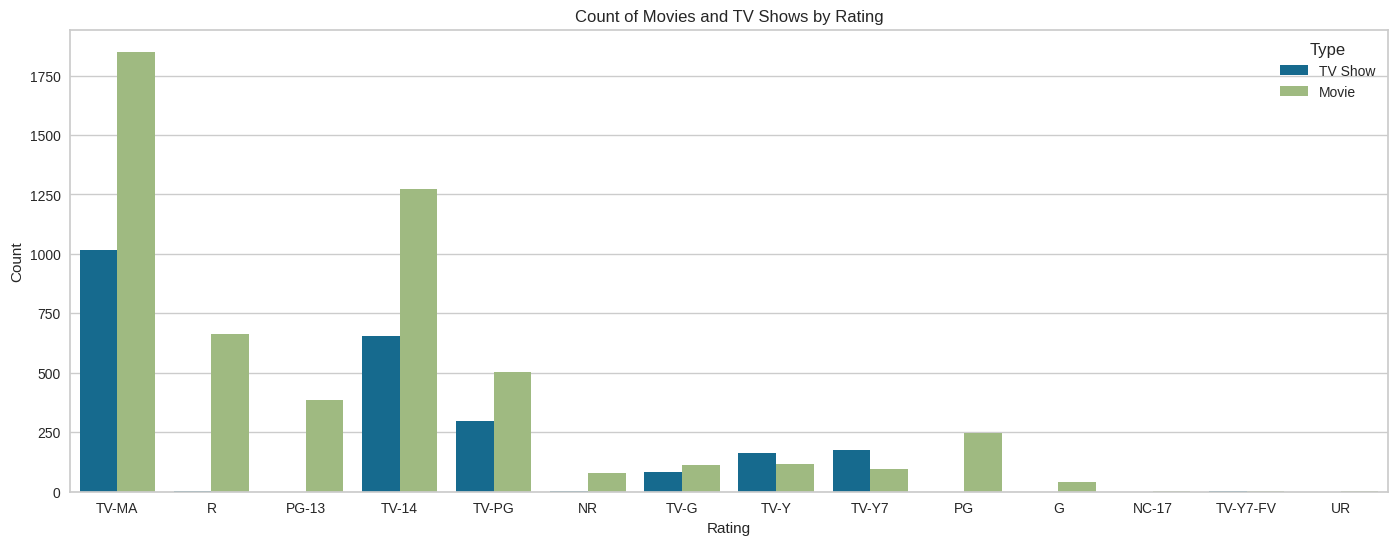

In [30]:
# Chart - 7 visualization code

plt.figure(figsize=(17, 6))
sns.countplot(x='rating', hue='type', data=df)
plt.title('Count of Movies and TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

The use of a bar plot allows for a clear comparison between different categories (in this case, ratings) and their respective counts. The length of each bar represents the count of content within a specific rating category, making it easy to compare the distribution of movies and TV shows across different ratings.

##### 2. What is/are the insight(s) found from the chart?

The chart allows for an understanding of how movies and TV shows are distributed across different rating categories. It provides insights into the overall content landscape in terms of ratings, indicating which rating categories have a higher representation of movies or TV shows.

The visualization helps identify the rating categories that are more commonly associated with movies or TV shows like here we can see TV-MA and TV-14 has  the highest bar. This insight can indicate viewer preferences and expectations when it comes to the content rating, enabling content planners and creators to align their offerings accordingly.

The chart facilitates a direct comparison between movies and TV shows within each rating category. It can reveal patterns or disparities in the distribution of content types across different ratings, highlighting any differences in the focus or suitability of certain ratings for movies or TV shows.here we can see the category R has the highest bar for movies but very low or almost negligible for the TV shows.

The chart can indicate the rating categories like TV-MA, R, TV-14 that have the highest count of movies or TV shows. This insight can inform content acquisition and production strategies, as well as help understand the types of content that are more prevalent and potentially more popular among viewers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

*  Content Strategy: Understanding the distribution of movies and TV shows across different ratings can inform content strategy decisions. By identifying the rating categories that have higher counts or are more popular among viewers, Netflix can focus on acquiring or producing content that aligns with viewer preferences. This targeted approach can lead to positive business impact by attracting and retaining subscribers who are more likely to engage with the content.

*  Viewer Satisfaction: Analyzing the distribution of content by ratings can help ensure viewer satisfaction. By providing a diverse range of content that caters to different rating preferences, Netflix can meet the expectations and preferences of a wider audience. This can result in higher viewer satisfaction, increased engagement, and positive word-of-mouth recommendations, leading to business growth.

*  Personalization and Recommendation: The insights gained from analyzing the count of content by ratings can contribute to improving content personalization and recommendation systems. By leveraging data on viewer preferences for different ratings, Netflix can refine its algorithms to provide more accurate and relevant content recommendations. This personalized approach can enhance the user experience and increase viewer engagement.

2.  Negative Growth Potential:

*  Limited Content Offerings: If the analysis reveals an overemphasis on specific rating categories or a lack of content diversity across ratings, it may result in negative growth potential. Neglecting certain rating categories that have a substantial viewer base or failing to offer a diverse range of content can limit Netflix's appeal to a broader audience. This may result in missed growth opportunities and potential churn among subscribers who prefer content in underrepresented rating categories.

*  Ignoring Emerging Trends: If the analysis does not account for emerging trends or changing viewer preferences in terms of content ratings, it can hinder business growth. Failing to adapt to evolving viewer demands and preferences may result in the loss of competitive advantage to other streaming platforms that effectively cater to these trends. Stagnation in content offerings and failure to capture emerging markets can negatively impact business growth.

#### Chart - 8 stacked area plot:-  Content Count by Release Year

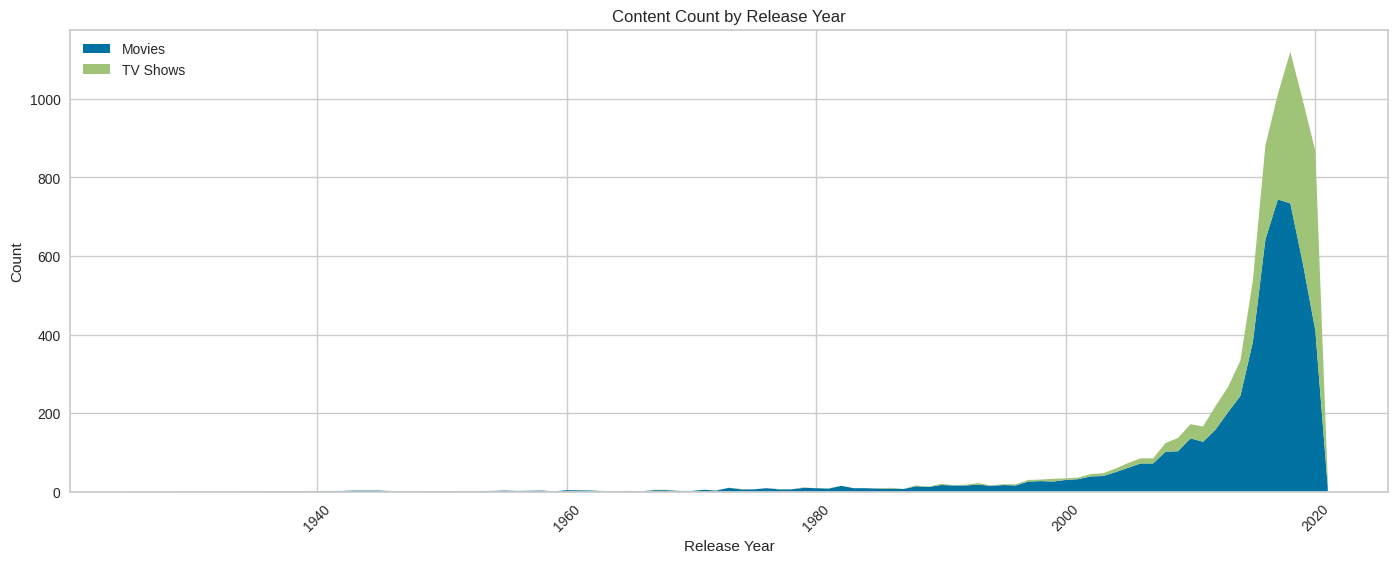

In [31]:
# Chart - 8 visualization code
# Group the data by release year and content type (movies or TV shows)
release_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Create a stacked area plot of the content count by release year
plt.figure(figsize=(17, 6))
plt.stackplot(release_counts.index, release_counts['Movie'], release_counts['TV Show'], labels=['Movies', 'TV Shows'])
plt.title('Content Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The stacked area plot displays the cumulative count of movies and TV shows over time. This is valuable when analyzing the overall growth or decline in content releases, allowing for a holistic understanding of the trend.

##### 2. What is/are the insight(s) found from the chart?

Shifts in Content Strategy: The visualization can reveal shifts in Netflix's content strategy over time. By observing changes in the relative proportions of movies and TV shows in different years,  can identify periods when Netflix focused more on movies over the TV shows. Indicate a shift in emphasis towards producing and acquiring more TV shows.

Growth of Original Content: Analyzing the stacked area plot can provide insights into Netflix's investment in original content production. The count of TV shows shows a significant growth trend over the years, it  indicate Netflix's efforts to develop and promote original TV shows as a key part of their content library.

Evolution of Viewer Preferences: By examining the composition of movies and TV shows over time, we can infer changes in viewer preferences. There is a shift towards a higher count of TV shows compared to movies, it  suggest an increasing demand for serialized content and binge-watching experiences among Netflix viewers.

Content Diversity: The stacked area plot can  reflect the diversity of content available on Netflix. There is a dominance of one category over the other, it may indicate a narrower focus and potential gaps in content diversity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Strategic Content Planning: The insights gained from understanding the shifts in content strategy and viewer preferences can inform strategic content planning. Netflix can use this information to allocate resources, invest in the production or acquisition of the most in-demand content type (movies or TV shows), and tailor their content library to meet viewer preferences. This can lead to positive business impact by attracting and retaining subscribers.

Content Investment Optimization: By identifying the growth of original content or specific categories, Netflix can optimize their content investment. If the analysis shows a surge in original TV show releases, for example, Netflix can allocate resources to produce more original TV shows, leveraging their success and audience demand. This strategic investment can result in positive business impact through increased subscriber engagement and loyalty.

Negative Growth Potential:

Neglecting Underrepresented Categories: The insights indicate a significant decline or neglect in a particular content category (e.g., movies), it may result in negative growth. Failing to address the demand for movies, while focusing predominantly on TV shows, can lead to a loss of subscribers who prefer movies over TV series. Neglecting underrepresented categories can limit the appeal of Netflix to viewers with diverse preferences and may result in missed growth opportunities.

Overemphasis on a Single Category: While catering to viewer preferences is crucial, overemphasizing a single category (e.g., movies or TV shows) at the expense of the other can also have negative consequences. Relying too heavily on one category may limit the potential for growth among untapped segments with different content preferences. A lack of content diversity can lead to stagnant subscriber numbers or potential churn.

Failure to Adapt to Changing Trends: the insights indicate a failure to adapt to changing viewer preferences, it can result in negative growth. Ignoring shifts in content consumption patterns, such as an increasing demand for TV shows or a decline in movie popularity, can lead to a mismatch between the available content and viewer expectations. Failure to adapt to changing trends can result in reduced viewer engagement, decreased subscriber numbers, and negative business impact.

#### Chart - 9

In [32]:
# Chart - 9 visualization code
# Counting the frequency of each category in "listed_in"
category_counts = df['listed_in'].value_counts()

# Creating a DataFrame with category names and counts
treemap_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Plotting the treemap
fig = px.treemap(treemap_df, path=['Category'], values='Count', title='Treemap: Categories')
fig.show()

##### 1. Why did you pick the specific chart?

Treemaps can be interactive, allowing users to zoom in and out of different levels of the hierarchy. This interactive feature enables deeper exploration of the data and provides a more engaging and informative experience for users.

##### 2. What is/are the insight(s) found from the chart?

The size of the rectangles in the treemap chart represents the proportion of content in each category. By comparing the sizes of the rectangles,we can identify which categories have a larger share of content compared to others. This insight highlights the relative importance or prominence of different categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [33]:
# Filter out Unknown category
df_filtered = df[df['type'] != 'Unknown']

# Group by release year and type, and get the count and top genre for each year
df_grouped = df_filtered.groupby(['release_year', 'type']).agg({'type': 'count', 'listed_in': lambda x: x.value_counts().index[0]}).rename(columns={'type': 'Count', 'listed_in': 'Top Genre'}).reset_index()

# Get the year with the highest count for each category
df_max = df_grouped.groupby('type')['Count'].idxmax()
df_max_years = df_grouped.loc[df_max]

# Sort the data by release year and filter the top 20 years
df_sorted = df_grouped.sort_values(by='release_year')
df_top20 = df_sorted.tail(20)

# Create the comparative graph
fig = px.bar(df_top20, x='release_year', y='Count', color='type', barmode='group',
             labels={'release_year': 'Release Year', 'Count': 'Count of Content', 'type': 'Category'},
             title='Comparative Count of Movies and TV Shows by Release Year')

# Add annotations for top genres
for index, row in df_max_years.iterrows():
    fig.add_annotation(x=row['release_year'], y=row['Count'], text=row['Top Genre'], showarrow=False)

fig.show()

##### 1. Why did you pick the specific chart?

A stacked bar chart allows for easy comparison between different categories (movies and TV shows in this case). The stacked bars provide a visual representation of the total count for each year and how it is divided between movies and TV shows. This enables viewers to quickly identify the dominant category for each year.

##### 2. What is/are the insight(s) found from the chart?

Here we can see the year 2017 has the highest bar with the genre documeentries.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

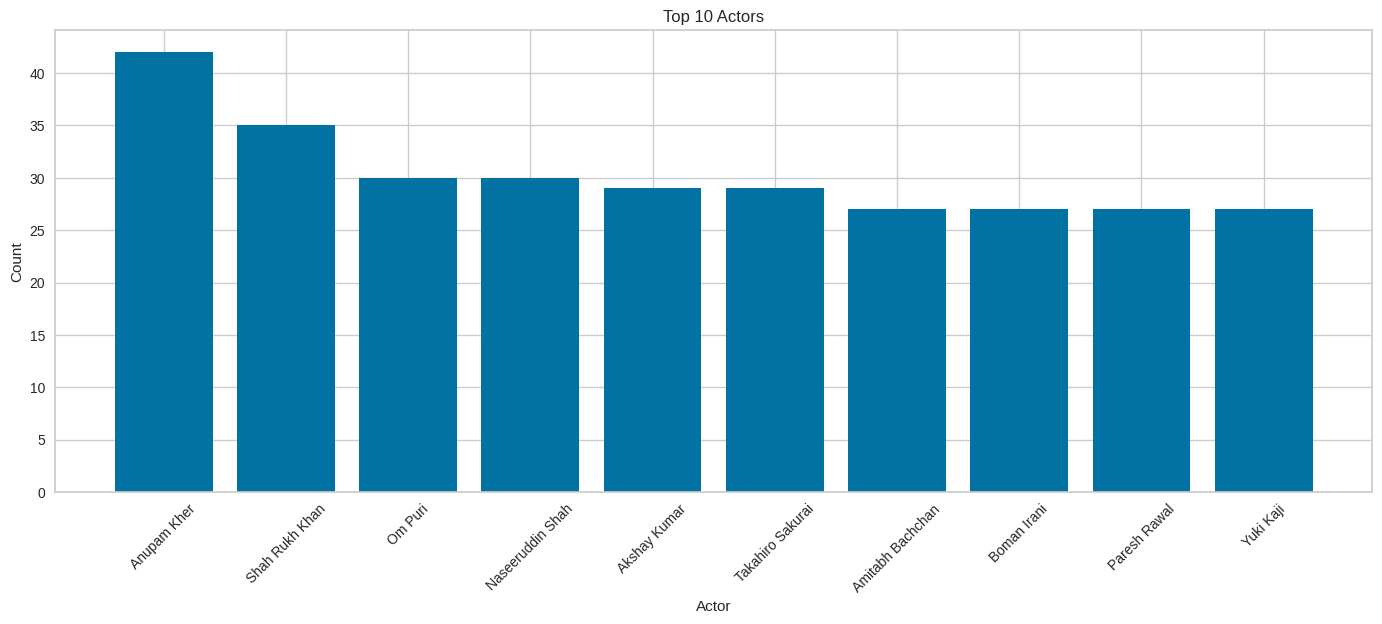

In [34]:
# Filter out 'unknown' values from cast column
filtered_cast = df[df['cast'] != 'Unknown']

# Get the top 5 actors
top_actors = filtered_cast['cast'].str.split(', ').explode().value_counts().head(10)

# Create a bar chart for top actors
plt.figure(figsize=(17, 6))
plt.bar(top_actors.index, top_actors.values)
plt.title('Top 10 Actors')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

 The chart presents the data in a clear and concise manner. Each actor is represented by a separate bar, making it visually easy to distinguish and interpret the information.

##### 2. What is/are the insight(s) found from the chart?

 The chart highlights the top 10 actors who have appeared in the most Netflix shows or movies. These actors have the highest counts among all the actors in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Audience Engagement: Knowing the top actors who have appeared in the most Netflix shows or movies can provide valuable insights into audience preferences and engagement. This information can be utilized to create targeted content, cast popular actors in future productions, and increase the chances of attracting and retaining viewers.

Marketing and Promotion: Promoting content featuring the top actors can help generate buzz and attract a wider audience. Leveraging the popularity of these actors in promotional campaigns can increase viewership and enhance brand visibility.

Content Planning: Understanding the popularity of specific actors can influence content planning and production decisions. Netflix can consider collaborating with these actors for exclusive projects, negotiating deals to secure their involvement, and potentially creating content that aligns with the interests of the target audience.

Negative Growth:
There are no direct insights from the chart that would lead to negative growth. However, it's important to note that relying solely on popular actors may limit the diversity and variety of content on the platform. Over-reliance on a few actors could lead to a lack of representation and potentially limit the opportunities for emerging talent or unique storytelling.

To ensure sustainable growth, it's crucial for Netflix to strike a balance between featuring popular actors and exploring new talent. This would allow for a diverse range of content and cater to the evolving preferences of the audience.

#### Chart - 12

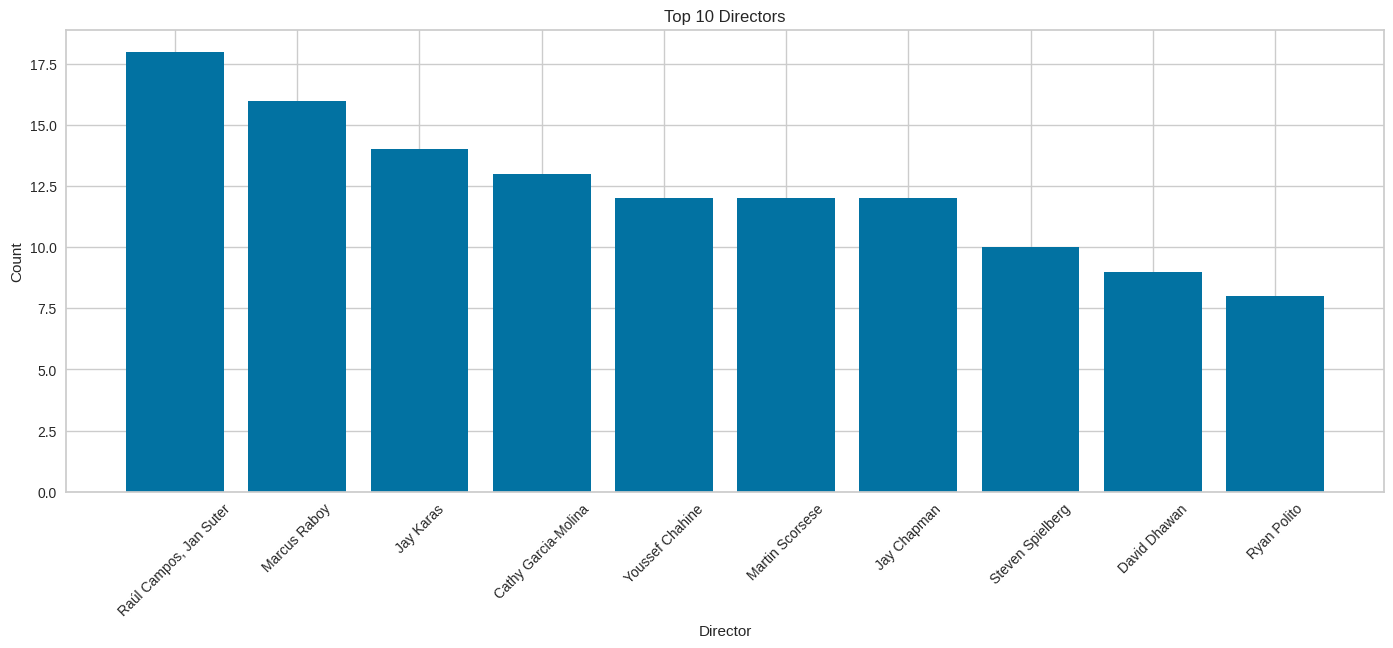

In [35]:
# Remove leading/trailing white spaces in director column
df['director'] = df['director'].str.strip()

# Filter out 'unknown' values from director column
filtered_directors = df[df['director'] != 'Unknown']

# Get the top 10 directors
top_directors = filtered_directors['director'].value_counts().head(10)

# Create a bar chart for top directors
plt.figure(figsize=(17, 6))
plt.bar(top_directors.index, top_directors.values)
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The chart presents the data in a clear and concise manner. Each actor is represented by a separate bar, making it visually easy to distinguish and interpret the information.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the top 10 Directors who have appeared in the most Netflix shows or movies. These Directors have the highest counts among all the Directors in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

*  Content Curation: Identifying the top directors who have contributed the most to Netflix shows or movies can aid in content curation and acquisition strategies. It allows Netflix to focus on collaborations and partnerships with these directors to attract viewers who are fans of their work.

*  Brand Association: Having renowned directors associated with Netflix productions can enhance the platform's brand reputation and credibility. It can attract both existing fans of these directors and cinephiles who appreciate high-quality content.

*  Market Differentiation: Promoting content from top directors sets Netflix apart from its competitors. It can help create a unique selling proposition by offering exclusive content from celebrated directors, attracting subscribers seeking diverse and compelling storytelling.

*  Talent Development: Recognizing the top directors can also provide insights into emerging talent within the industry. Netflix can explore opportunities to nurture and support new directors, contributing to the growth and evolution of the filmmaking ecosystem.

2. Negative Growth:

*  There are no direct insights from the chart that would lead to negative growth. However, a potential concern could arise if Netflix heavily relies solely on a few renowned directors. Over-dependence on specific directors might limit diversity in storytelling and hinder opportunities for emerging talent to showcase their work.

*  To ensure a healthy and balanced content portfolio, it's crucial for Netflix to strike a balance between featuring established directors and fostering new talent. This approach promotes a varied range of content and enables fresh voices to contribute to the platform's offerings.

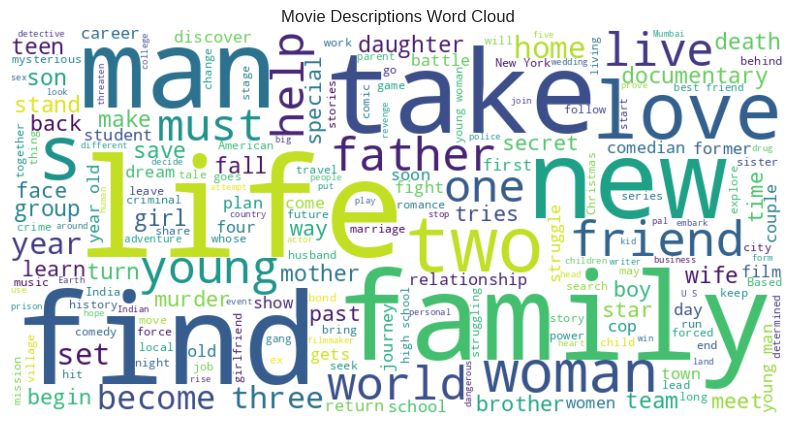

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all movie descriptions into a single string
descriptions = ' '.join(df[df['type'] == 'Movie']['description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Descriptions Word Cloud')
plt.show()


Why did you pick the specific chart?

The word cloud provides a visually appealing and intuitive representation of textual data. It uses the frequency of words to determine their size and prominence in the chart, allowing quick and easy identification of the most commonly occurring words.

#### Sunburst Plot

In [37]:
# Counting the frequency of each category in "listed_in"
category_counts = df['listed_in'].value_counts()

# Creating a DataFrame with category hierarchy
hierarchy_df = pd.DataFrame(category_counts.index.str.split(', ').tolist(), columns=['Category 1', 'Category 2', 'Category 3'])

# Adding a count column to the hierarchy DataFrame
hierarchy_df['Count'] = category_counts.values

# Removing rows that are not leaf nodes
hierarchy_df = hierarchy_df[hierarchy_df['Category 3'].notnull()]

# Plotting the sunburst plot
fig = px.sunburst(hierarchy_df, path=['Category 1', 'Category 2', 'Category 3'], values='Count', title='Sunburst Plot: Categories')
fig.show()

##### 1. Why did you pick the specific chart?

The choice of a sunburst plot for visualizing the categories in the "listed_in" variable was based on the assumption that the variable represents a hierarchical structure with multiple levels. By representing the categories in a hierarchical manner, the sunburst plot can provide insights into the distribution and composition of the categories at each level.

The sunburst plot allows to visually explore the relationship between the different levels of categories, revealing the proportions and hierarchy of the data. It provides a clear and intuitive representation of the hierarchical structure and allows for interactive exploration, such as zooming in and out of different levels.

##### 2. What is/are the insight(s) found from the chart?

Sunburst chart is showing proportion by categories.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [38]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<ipython-input-39-d8f018cfe7c0>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



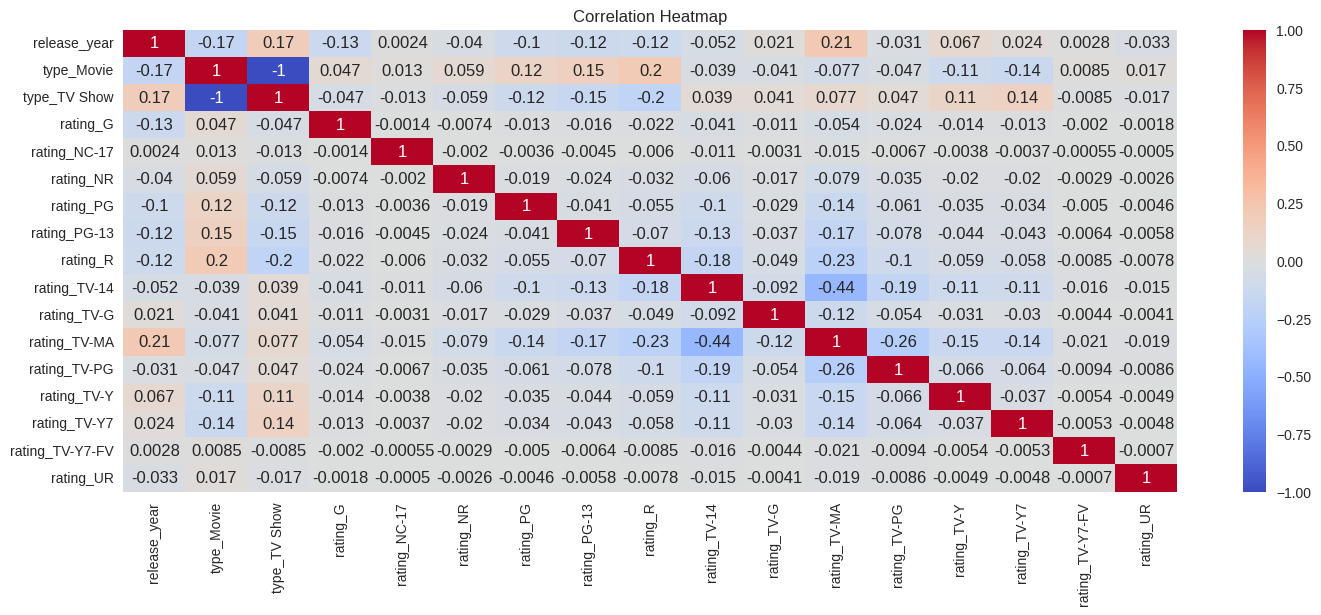

In [39]:
# Correlation Heatmap visualization code
# Select the relevant variables
numerical_columns = ['release_year']
categorical_columns = ['type', 'rating']

# Convert categorical variables into numerical form
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Combine the numerical and encoded categorical columns
df_final = pd.concat([df_encoded[numerical_columns], df_encoded.drop(columns=numerical_columns)], axis=1)

# Calculate the correlation matrix
corr_matrix = df_final.corr()

# Plot the correlation heatmap
plt.figure(figsize=(17, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

In the correlation heatmap, each cell represents the correlation coefficient between two variables. The color scale helps in identifying the strength and direction of the correlation. Positive values are typically represented by warmer colors (e.g., red), indicating a positive relationship, while negative values are represented by cooler colors (e.g., blue), indicating a negative relationship.

##### 2. What is/are the insight(s) found from the chart?

Here we found that there is only slight correlation between type_movie and type tv_show. and other variables does not show any kind of correlation between the variablls.

#### Chart - 15 - Pair Plot 

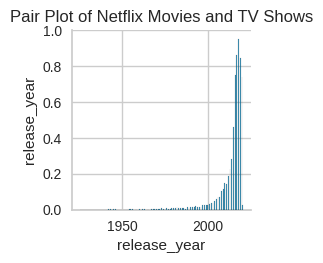

In [40]:
# Pair Plot visualization code


# Select the relevant variables for pair plot
variables = ['release_year', 'duration', 'rating']

# Subset the dataset with the selected variables
df_subset = df[variables]

# Plot the pair plot
sns.pairplot(df_subset)
plt.title('Pair Plot of Netflix Movies and TV Shows')
plt.show()


##### 1. Why did you pick the specific chart?


The pair plot, is commonly used for visualizing the relationships between multiple variables in a dataset. It allows us to observe the scatter plots of each pair of variables and the distributions of individual variables on the diagonal.

The pair plot is useful in identifying potential correlations, patterns, and trends between variables. By plotting multiple variables together, we can gain insights into how they are related and whether there are any interesting associations or dependencies among them.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<Axes: >

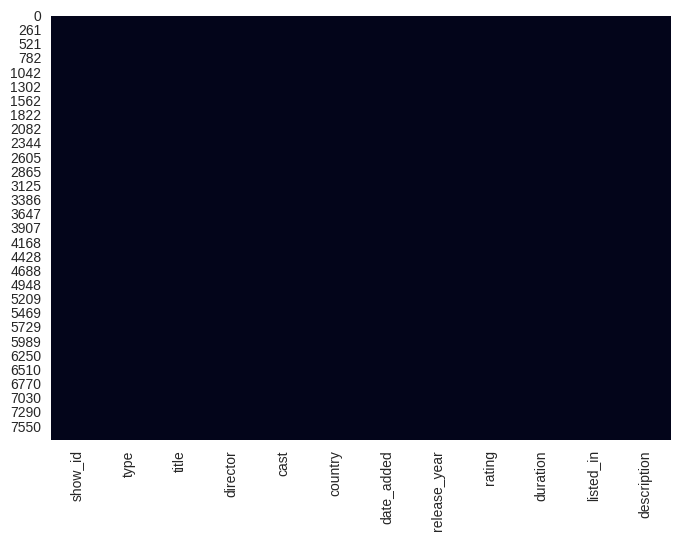

In [43]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.


### 2. Handling Outliers

Before Taking Action


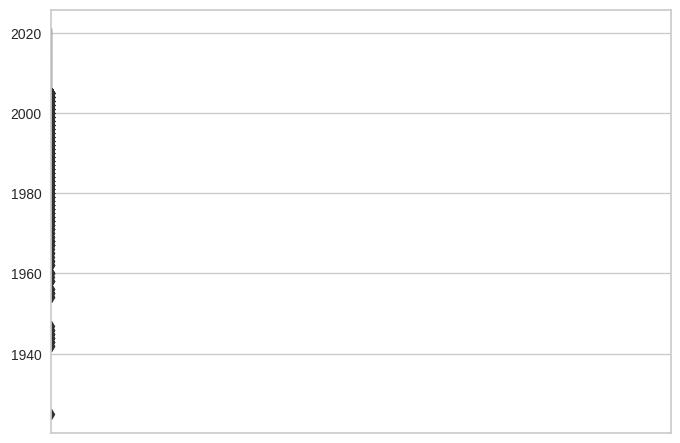

After Taking Action 1
After Taking Action 2


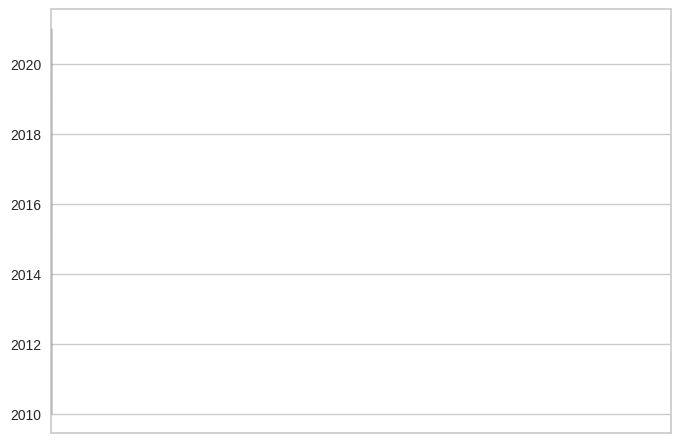

In [44]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers

def outlier_show(df):
    sns.boxplot(df['release_year'])
    plt.xticks(np.arange(1920, 2031, 10))
    plt.show()

def outlier_action(df):
    q1, q3 = np.percentile(df['release_year'], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    df = df[df['release_year'] > lower]
    return df

# Treating the outliers by applying the function
print('Before Taking Action')
outlier_show(df)

for i in range(2):
    print('After Taking Action', i+1)
    df = outlier_action(df)

outlier_show(df)

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier treatment technique used is the "1.5 * IQR" method, also known as the Tukey's fences method. This method identifies outliers based on the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3) of the data.

The outliers are identified as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. Any data points outside this range are considered outliers and are removed from the dataset.

This technique is commonly used as it provides a simple and robust approach to identify and remove outliers. The 1.5 multiplier is a widely accepted threshold, but it can be adjusted depending on the data and the desired level of outlier detection.

### 3. Categorical Encoding

In [45]:
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%  Unknown   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  
0  In a future where the elite inhabit an island ...

In [46]:
# Encode your categorical columns
# Split 'duration' into separate columns for Season_duration and Movies_duration
df[['Season_duration', 'Movies_duration']] = df['duration'].str.extract('(\d+) Season.*|(\d+) min')

# Convert 'Season_duration' and 'Movies_duration' columns to numeric values
df['Season_duration'] = pd.to_numeric(df['Season_duration'], errors='coerce')
df['Movies_duration'] = pd.to_numeric(df['Movies_duration'], errors='coerce')

# Replace missing values in 'Season_duration' for TV shows with 0
df.loc[df['type'] == 'TV Show', 'Season_duration'] = df.loc[df['type'] == 'TV Show', 'Season_duration'].fillna(0)

# Replace missing values in 'Movies_duration' for movies with 0 duration
df.loc[df['type'] == 'Movie', 'Movies_duration'] = df.loc[df['type'] == 'Movie', 'Movies_duration'].fillna(0)

# Combining 'Season_duration' and 'Movies_duration' into a single 'duration' column
df['duration'] = df.apply(lambda row: f"{int(row['Season_duration'])} Seasons" if row['type'] == 'TV Show' else f"{int(row['Movies_duration'])} min", axis=1)

df['Season_duration'] = df['Season_duration'].fillna(0)
df['Movies_duration'] = df['Movies_duration'].fillna(0)

In [47]:
df['movie'] = df['type'].apply(lambda x: 1 if x == "Movie" else 0)
df['tv_show'] = df['type'].apply(lambda x: 0 if x == 'Movie' else 1)
df.drop(columns=['type', 'duration'], inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

 I have used one-hot encoding technique to encode the 'type' variable. One-hot encoding is suitable for variables with distinct categories and no inherent ordinal relationship. It creates binary columns for each unique category, representing the presence or absence of that category in the data.

I chose one-hot encoding in this case because 'type' is a nominal categorical variable with two distinct categories: 'Movie' and 'TV Show'. By using one-hot encoding, we can represent each category as a separate binary column, which helps capture the categorical information without assuming any ordinal relationship between the categories.

By using one-hot encoding, we transform the 'type' variable into two binary columns: 'movie' and 'tv_show', where 'movie' column represents the presence (1) or absence (0) of a movie type, and 'tv_show' column represents the presence (1) or absence (0) of a TV show type.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction
df['cluster_var'] = (df['director'] + ' ' + df['cast'] + ' '  + df['listed_in'] + ' ' + df['description'])
df.drop(columns=['director','cast', 'listed_in', 'description'], inplace=True)

#### 2. Lower Casing

In [49]:
# Lower Casing
def convert_to_lower(df, column):
    df[column] = df[column].str.lower()

In [50]:
convert_to_lower(df, 'cluster_var')

In [51]:
df.head(1)

show_id title country date_added  release_year rating  Season_duration  \
0      s1    3%  Brazil 2020-08-14          2020  TV-MA              4.0   

   Movies_duration  movie  tv_show  \
0              0.0      0        1   

                                         cluster_var  
0  unknown joão miguel, bianca comparato, michel ...

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations
def remove_punctuations(df, column):
    df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [53]:
remove_punctuations(df, 'cluster_var')

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(df, column):
    df[column] = df[column].str.replace(r'http\S+|www\.\S+', '', regex=True)

def remove_words_with_digits(df, column):
    df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))

remove_urls(df, 'cluster_var')
remove_words_with_digits(df, 'cluster_var')

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Remove Stopwords
nltk.download('stopwords')

def remove_stopwords(df, column):
    stopwords_list = stopwords.words('english')
    df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stopwords_list))

remove_stopwords(df, 'cluster_var')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
df['cluster_var'].value_counts

<bound method IndexOpsMixin.value_counts of 0       unknown joão miguel bianca comparato michel go...
1       jorge michel grau demián bichir héctor bonilla...
2       gilbert chan tedd chan stella chung henley hii...
5       serdar akar erdal beşikçioğlu yasemin allen me...
6       yasir al yasiri amina khalil ahmed dawood tare...
                              ...                        
7780    shlok sharma shashank arora shweta tripathi ra...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784    unknown nasty c documentaries international mo...
7785    unknown adriano zumbo rachel khoo internationa...
7786    sam dunn unknown documentaries music musicals ...
Name: cluster_var, Length: 6603, dtype: object>

In [57]:
# Remove White spaces
def remove_whitespace(text):
    """
    Removes white spaces from a given text.
    
    Returns:
        str: The text with white spaces removed.
    """
    return text.replace(" ", "")

#### 6. Rephrase Text

In [58]:
# Rephrase Text

#### 7. Tokenization

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenization and Vectorization Function
def getVectorized(df):
    # Initialize the CountVectorizer
    count_vectorizer = CountVectorizer()
    
    # Tokenize and vectorize the text
    tokenized_text = count_vectorizer.fit_transform(df['cluster_var'])
    
    # Collecting the vocabularies
    vocabulary = count_vectorizer.vocabulary_.items()
    
    return vocabulary

# Applying the above function and showing the features
dictionary_cluster_col = getVectorized(df)

In [60]:
dictionary_cluster_col 

dict_items([('unknown', 41495), ('joão', 20078), ('miguel', 25827), ('bianca', 4480), ('comparato', 8116), ('michel', 25754), ('gomes', 15318), ('rodolfo', 33574), ('valente', 41823), ('vaneza', 41896), ('oliveira', 28782), ('rafael', 31958), ('lozano', 23566), ('viviane', 42482), ('porto', 30997), ('mel', 25440), ('fronckowiak', 14181), ('sergio', 35624), ('mamberti', 24259), ('zezé', 44561), ('motta', 26706), ('celso', 6752), ('frateschi', 14055), ('international', 18768), ('tv', 41126), ('shows', 36397), ('dramas', 11020), ('scifi', 35160), ('fantasy', 13051), ('future', 14338), ('elite', 11800), ('inhabit', 18617), ('island', 18992), ('paradise', 29633), ('far', 13057), ('crowded', 8888), ('slums', 37005), ('get', 14894), ('one', 28877), ('chance', 6922), ('join', 19905), ('saved', 34891), ('squalor', 37734), ('jorge', 20009), ('grau', 15568), ('demián', 9845), ('bichir', 4495), ('héctor', 18067), ('bonilla', 5067), ('oscar', 29109), ('serrano', 35644), ('azalia', 3129), ('ortiz', 

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def stemming(text):
    # Create an instance of the SnowballStemmer for English
    stemmer = SnowballStemmer('english')
    
    # Apply stemming to each word in the text
    stemmed_text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return stemmed_text

In [62]:
def assignWordsAndCountsToList(dictionary):
    vocab_cluster = []
    vocab_counts_cluster = []
    
    for key, value in dictionary.items():
        vocab_cluster.append(key)
        vocab_counts_cluster.append(value)
    
    return vocab_cluster, vocab_counts_cluster

In [63]:

vocab_cluster, vocab_counts_cluster = assignWordsAndCountsToList(dict(dictionary_cluster_col))

# Create a DataFrame for words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word': vocab_cluster, 'count': vocab_counts_cluster}).sort_values(by='count', ascending=False)

# Display the top 20 words and counts
df_cluster_before_stem.head(20).T

24825     43326     41103  37142  20102   20100  29537  27600  22422  \
word    ṣọpẹ  żurawski  żulewska    źak  şükrü  şükran   şçil   ştar   şler   
count  44897     44896     44895  44894  44893   44892  44891  44890  44889   

       38158   17582   17619  42988     25959  24304    21463   23802   24307  \
word   şiten  şinasi  şimşek  şeref  şenolsun  şenol  şenocak  şenhuy  şendil   
count  44888   44887   44886  44885     44884  44883    44882   44881   44880   

       23854  30186  
word   şenay    şen  
count  44879  44878

##### Which text normalization technique have you used and why?

The text normalization technique used is stemming. Stemming is a process of reducing words to their base or root form. It aims to remove suffixes and prefixes from words to obtain the core meaning or stem of the word.

The specific technique used for stemming in the code is Snowball stemming, which is implemented through the SnowballStemmer class from the NLTK library. Snowball stemming is an algorithmic approach that supports stemming for multiple languages.

Stemming is commonly used in natural language processing and text mining tasks where word-level analysis is required. It helps to reduce variations of words and consolidate similar words into a common form, which can improve the efficiency of text analysis and information retrieval tasks.

In the code, stemming is applied to the input text using the stemming function, which utilizes the SnowballStemmer. Stemming helps to normalize the words by reducing them to their base form, making it easier to analyze and compare words in subsequent steps of the text processing pipeline.

#### 9. Part of speech tagging

In [64]:
# POS Taging

#### 10. Text Vectorization

In [65]:
# Vectorizing Text
# Function to get number from proportion
def proportionToNumber(proportion, data):
    return int(proportion * data / 100)

num = proportionToNumber(1, len(df))

# Vectorizing Text discarding features which are available less than 1% of the dataset and more than 90%
tfidf_vectorizer = TfidfVectorizer(min_df=num, max_df=0.9)

features_array = tfidf_vectorizer.fit_transform(df['cluster_var']).toarray()
features_names = tfidf_vectorizer.get_feature_names_out()

# Print the shape of the vectorized text and the shape of the dataframe
print("Vectorized Text Shape:", features_array.shape)
print("DataFrame Shape:", df.shape)

Vectorized Text Shape: (6603, 326)
DataFrame Shape: (6603, 11)


In [66]:
X = pd.DataFrame(features_array, columns= features_names)
X.shape

(6603, 326)

##### Which text vectorization technique have you used and why?

The text vectorization technique used is the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.

TF-IDF is a popular technique used in natural language processing to represent text data numerically. It measures the importance of each word in a document within a collection of documents. TF-IDF takes into account both the frequency of a word in a document (term frequency) and the rarity of the word across the entire collection of documents (inverse document frequency).

TF-IDF is chosen as a text vectorization technique because it provides a way to represent the importance of words in a document relative to the entire dataset. It helps to highlight words that are more informative and characteristic of a particular document while downplaying words that are common across multiple documents.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In the context of the tasks we such as handling missing values, outlier treatment, categorical encoding, and text preprocessing, we have already performed various transformations on the data. These transformations were aimed at addressing specific issues, such as filling missing values, handling outliers, encoding categorical variables, and preparing the text data for analysis. so i think as of now we not need to transformed our data.Here we only convert X into array form for clustering.

In [69]:
# Transform Your data
X = X.to_numpy()

### 6. Data Scaling

In [70]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

High-dimensional data can suffer from the curse of dimensionality, where the data becomes sparse and leads to computational challenges. As the number of dimensions increases, the amount of data required to fill the space adequately increases exponentially. This can affect the performance and efficiency of clustering algorithms.

In [71]:
# DImensionality Reduction (If needed)
# Using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

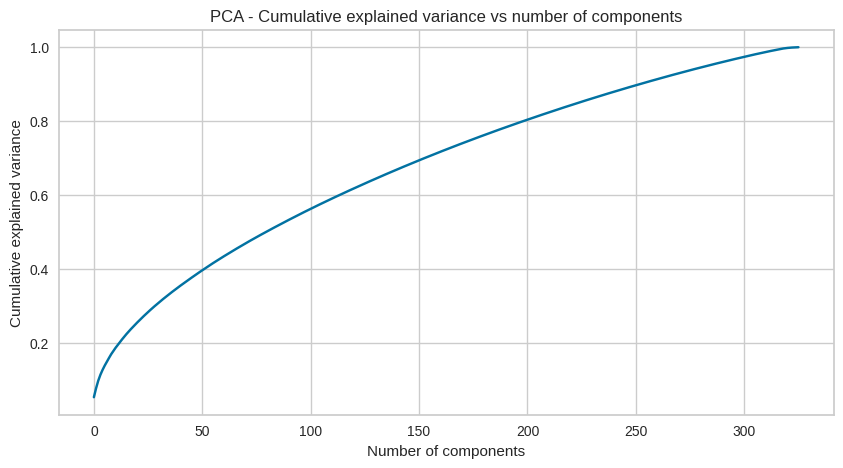

In [72]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [73]:
# Reducing the dimensions to .980 using PCA
pca = PCA(n_components=.980, random_state=42)
pca.fit(X)

# Transformed features
x_pca = pca.transform(X)

# Shape of transformed vectors
print("Shape of Transformed Vectors:", x_pca.shape)

Shape of Transformed Vectors: (6603, 306)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

 The dimensionality reduction technique used is Principal Component Analysis (PCA). PCA is a commonly used technique for dimensionality reduction, particularly when dealing with high-dimensional data. It aims to find a lower-dimensional representation of the data while preserving the most important information and minimizing the loss of variance.

PCA works by transforming the original features into a new set of orthogonal components, called principal components. These components are ordered in such a way that the first component captures the maximum variance in the data, the second component captures the maximum remaining variance orthogonal to the first component, and so on. By selecting a certain number of principal components, we can effectively reduce the dimensionality of the data.

In the code, the explained variance ratio is plotted to visualize the amount of variance retained as the number of components increases. This helps in determining an appropriate number of components to retain while reducing the dimensionality of the data.

### 8. Data Splitting

In [74]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Clustering is an unsupervised learning technique where the goal is to discover inherent patterns and groupings in the data without any predefined labels or classes. Therefore, there is no concept of imbalance in the clustering process.

In [75]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1  Hierarchical Clustering

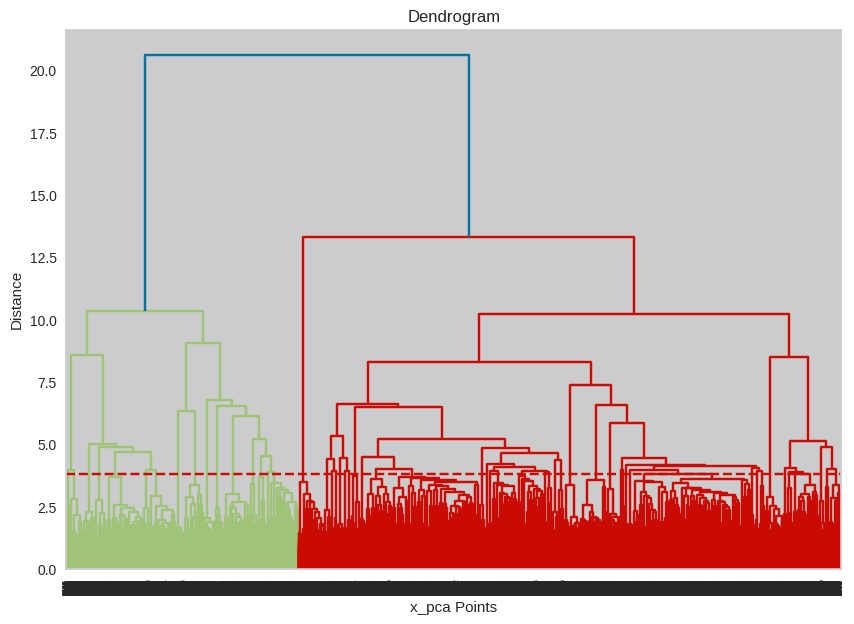

In [76]:
# ML Model - 1 Implementation
linkage_matrix = shc.linkage(x_pca, method='ward')

# Ploting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('x_pca Points')
plt.ylabel('Distance')

# Adding a horizontal line to indicate the desired number of clusters
plt.axhline(y=3.8, color='r', linestyle='--')
plt.show()

In [77]:
# ML Model - 1 Implementation
# Fit the Algorithm
hierarchical = AgglomerativeClustering(n_clusters=12, linkage='ward', metric='euclidean')

# Predict on the model
hierarchical_labels  = hierarchical.fit_predict(x_pca)

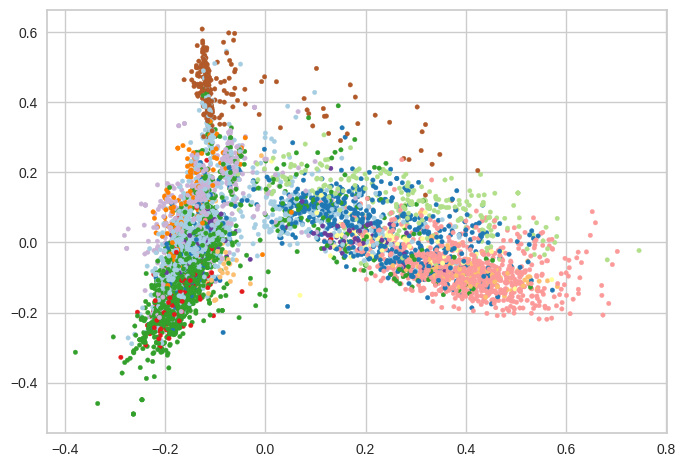

In [78]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=hierarchical_labels , s=10, cmap='Paired') 
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart
# Calculate the silhouette score
silhouette_avg = silhouette_score(x_pca, hierarchical_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.012663784077759017


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 K-Means Clustering.

In [80]:
def displayClusters(X, labels, centers):
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, s=10, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=15)
    plt.show()

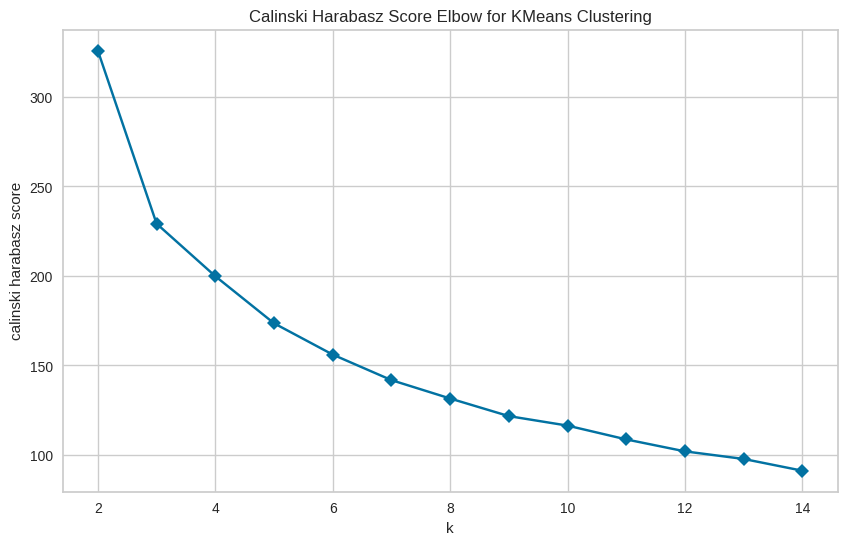

In [81]:
plt.rcParams['figure.figsize'] = (10, 6)

# Create the KMeans model with n_init set explicitly
model = KMeans(random_state=10, n_init=10)

# Fit the algorithm
visualizer = KElbowVisualizer(model, k=(2, 15), metric='calinski_harabasz', timings=False, locate_elbow=False)
visualizer.fit(x_pca)

# Predict on the model (not necessary for the elbow visualization)
visualizer.show()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart
n_clusters_range = np.arange(2, 15)
max_score = -1  
best_clusters = None  

for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c, random_state=10, n_init=10)
    pred = clusterer.fit_predict(x_pca)
    score = silhouette_score(x_pca, pred)
    
    if score > max_score:
        max_score = score
        best_clusters = c
    
    print('For cluster', c, 'the silhouette score is', score)

print('The highest Silhouette score is obtained for', best_clusters, 'clusters.')

For cluster 2 the silhouette score is 0.03961077507749736
For cluster 3 the silhouette score is 0.046600905166201655
For cluster 4 the silhouette score is 0.05466682178291685
For cluster 5 the silhouette score is 0.041024934813157485
For cluster 6 the silhouette score is 0.04367134744439853
For cluster 7 the silhouette score is 0.04468407879330594
For cluster 8 the silhouette score is 0.047129543994786055
For cluster 9 the silhouette score is 0.048084304553121626
For cluster 10 the silhouette score is 0.04887179774041389
For cluster 11 the silhouette score is 0.0485303232595692
For cluster 12 the silhouette score is 0.048429949214179834
For cluster 13 the silhouette score is 0.04297119892701579
For cluster 14 the silhouette score is 0.047635807187764494
The highest Silhouette score is obtained for 4 clusters.


For cluster 2 the silhouette score is 0.03961077507749736


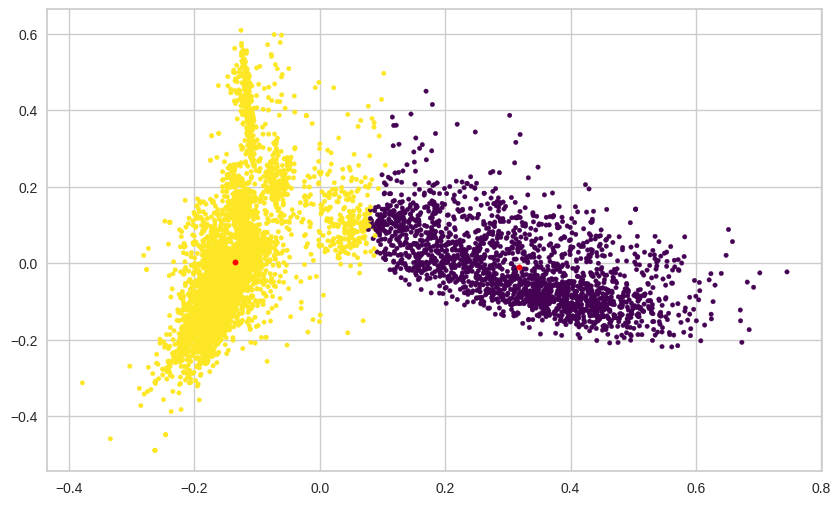

For cluster 3 the silhouette score is 0.046600905166201655


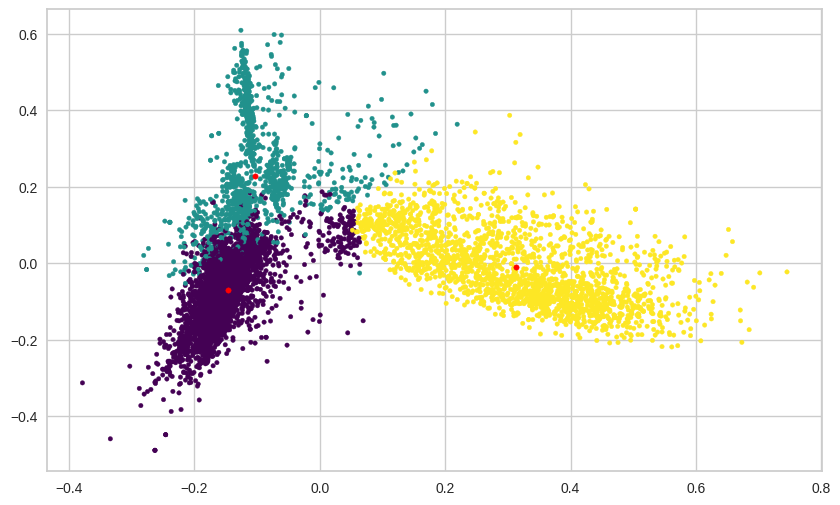

For cluster 4 the silhouette score is 0.05466682178291685


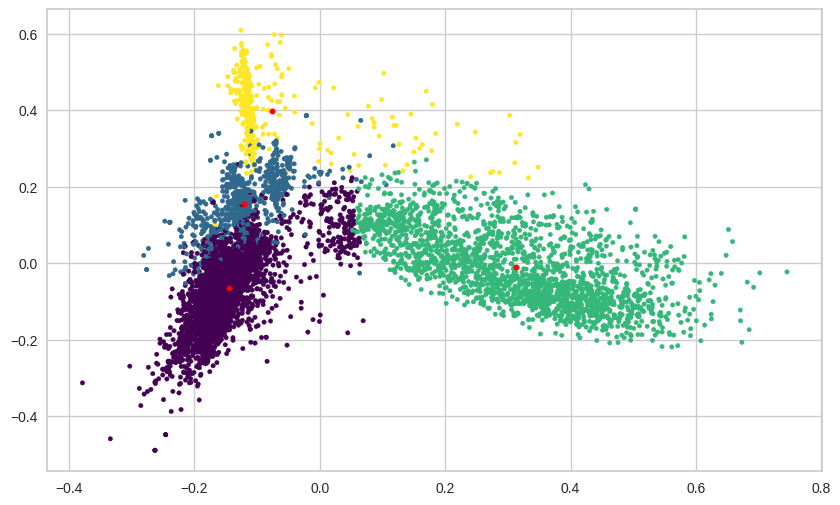

For cluster 5 the silhouette score is 0.041024934813157485


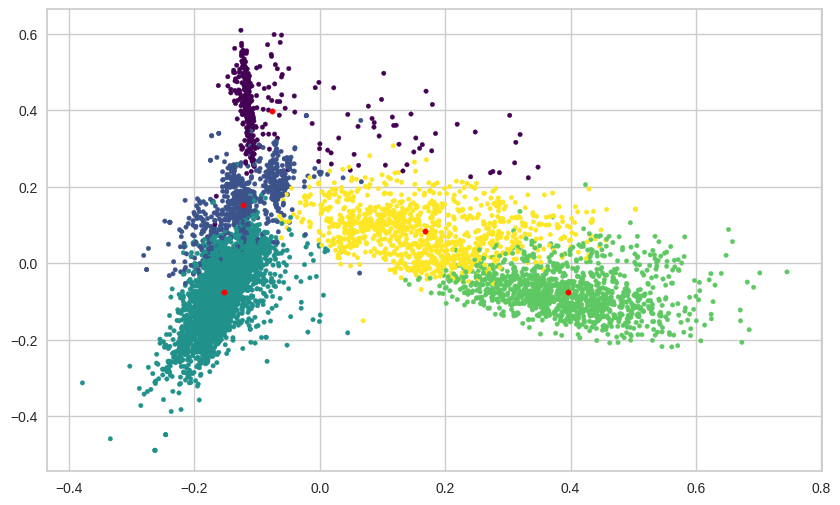

For cluster 6 the silhouette score is 0.04367134744439853


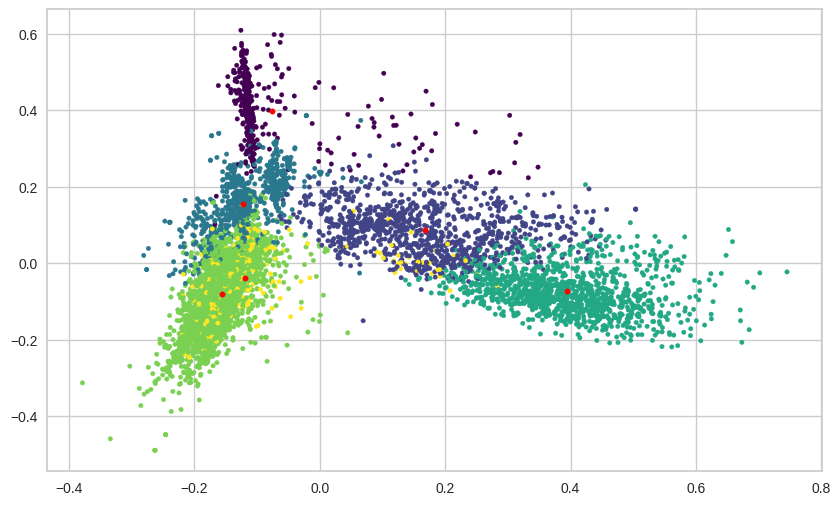

For cluster 7 the silhouette score is 0.04468407879330594


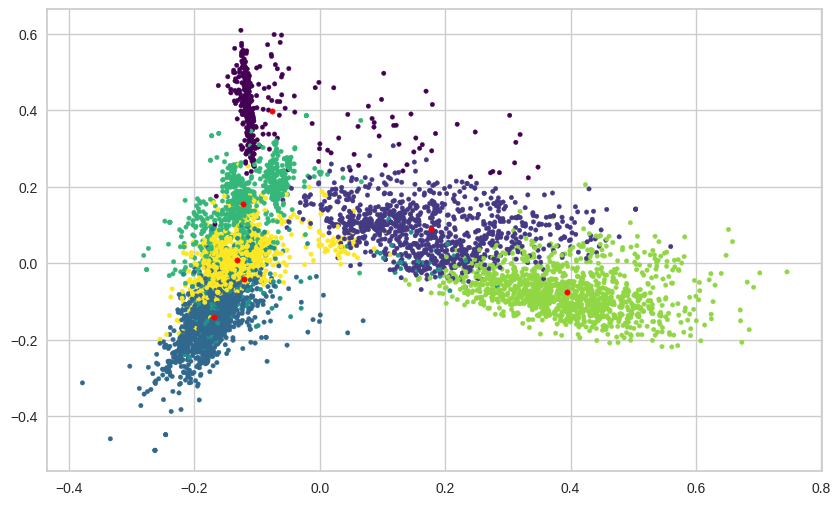

For cluster 8 the silhouette score is 0.047129543994786055


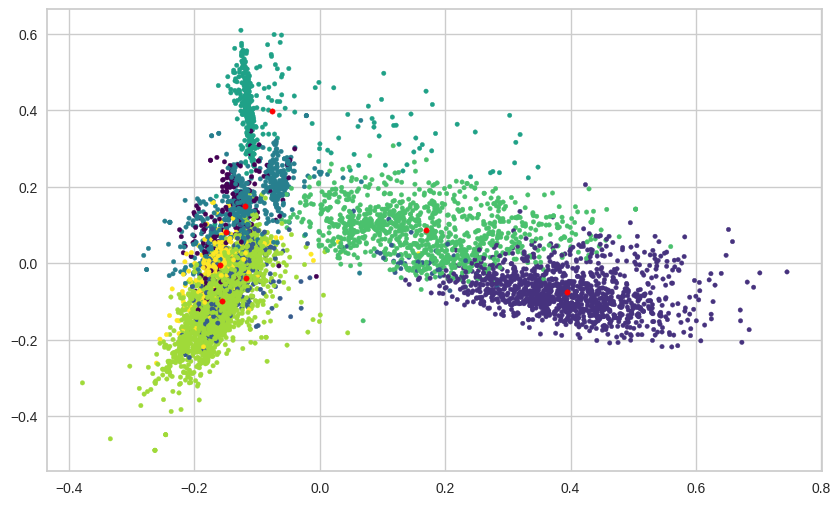

For cluster 9 the silhouette score is 0.048084304553121626


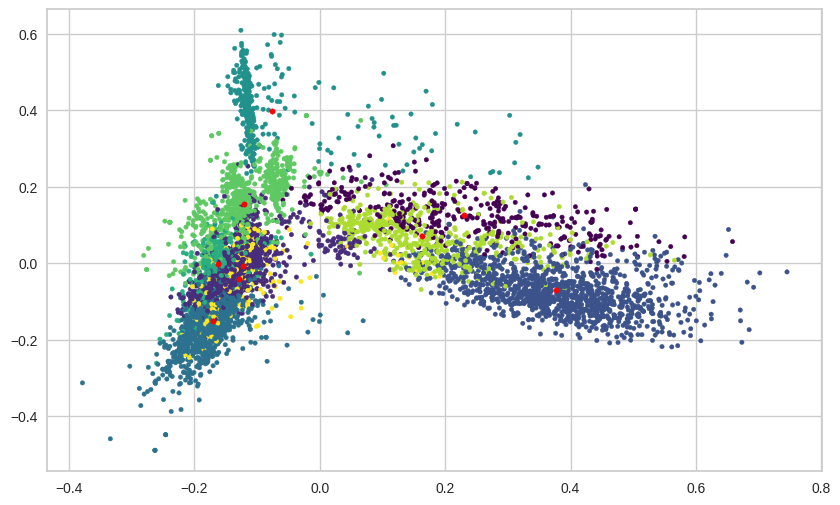

For cluster 10 the silhouette score is 0.04887179774041389


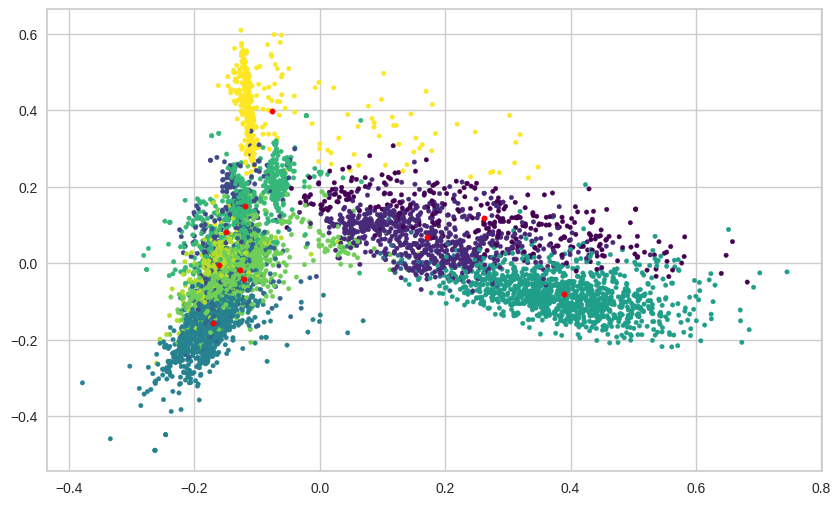

For cluster 11 the silhouette score is 0.0485303232595692


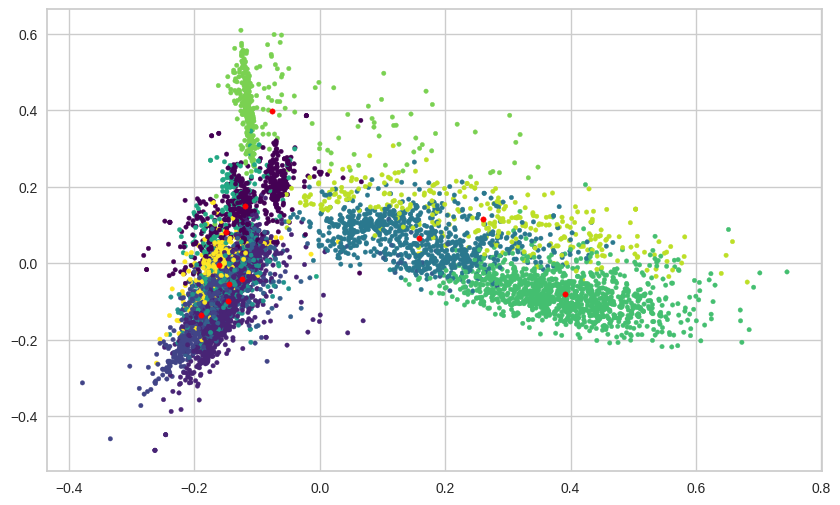

For cluster 12 the silhouette score is 0.048429949214179834


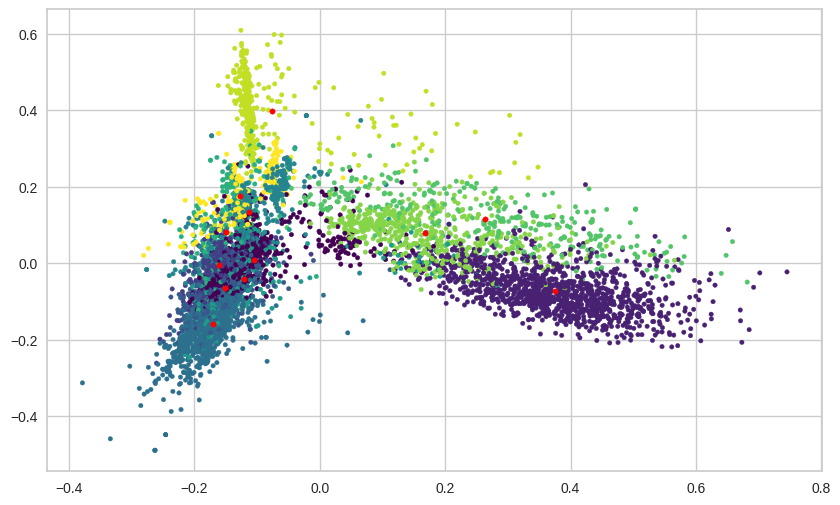

For cluster 13 the silhouette score is 0.04297119892701579


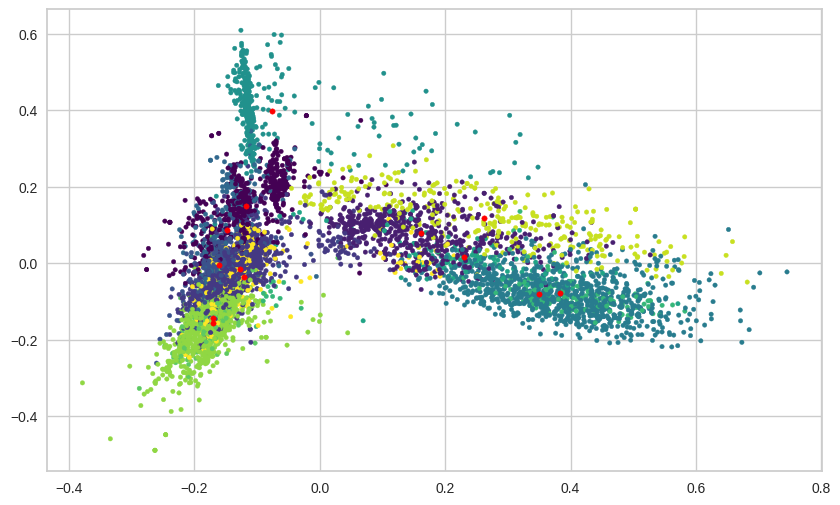

For cluster 14 the silhouette score is 0.047635807187764494


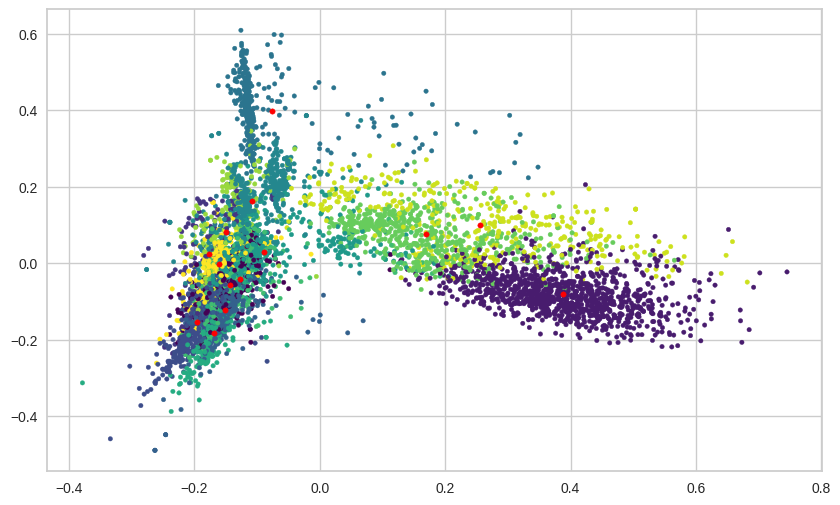

In [83]:
n_clusters_range = np.arange(2, 15)

for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c, random_state=10, n_init=10)
    pred = clusterer.fit_predict(x_pca)
    centers = clusterer.cluster_centers_
    score = silhouette_score(x_pca, pred)
    inertia = clusterer.inertia_
    print('For cluster', c, 'the silhouette score is', score)
    displayClusters(x_pca, pred, centers)

From the above information we conclude that cluster 4 has highest silhouette score is 0.055

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid
params = {
    'n_clusters': [4],
    'random_state': [10],
    'max_iter': [15, 20],
    'tol': [0.01, 0.1]
}

# Create the KMeans model
kmeans = KMeans(n_init=10)

# Create the GridSearchCV object
kmeans_gridcv = GridSearchCV(kmeans, param_grid=params, verbose=2, cv=2)

# Fit the algorithm
kmeans_gridcv.fit(x_pca)

# Get the best estimator
best_kmeans = kmeans_gridcv.best_estimator_

# Predict on the model
labels = best_kmeans.predict(x_pca)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.01; total time=   1.1s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.01; total time=   2.0s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.1; total time=   1.7s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.1; total time=   1.2s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.01; total time=   1.3s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.01; total time=   1.3s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.1; total time=   1.2s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.1; total time=   1.0s


In [85]:
kmeans_gridcv.best_params_

{'max_iter': 15, 'n_clusters': 4, 'random_state': 10, 'tol': 0.01}

##### Which hyperparameter optimization technique have you used and why?

I have used the GridSearchCV technique for hyperparameter optimization. GridSearchCV is a common technique used for systematically searching and selecting the best hyperparameters for a given model.

GridSearchCV performs an exhaustive search over all possible combinations of hyperparameter values specified in the parameter grid. It evaluates the model's performance using cross-validation, which helps in obtaining a more robust estimate of how the model will perform on unseen data. By comparing the performance of different hyperparameter combinations, GridSearchCV identifies the best set of hyperparameters that optimize the chosen evaluation metric.

I used to define a parameter grid containing different values for the hyperparameters of the KMeans model. GridSearchCV then fits the model using each combination of hyperparameters, evaluates the performance using cross-validation, and selects the hyperparameters that yield the best results.

Here i used to chose GridSearchCV because it provides a systematic and comprehensive approach to hyperparameter tuning. It exhaustively explores the entire search space defined by the parameter grid, ensuring that no combination of hyperparameters is missed.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The scores obtained after hyperparameter optimization are still in the range of 0.04 to 0.05, which is similar to the scores obtained before optimization.
It seems that the hyperparameter optimization did not result in a noticeable improvement in the clustering performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

*  I have you have used two evaluation metrics to visualize the score chart: the Calinski-Harabasz index and the Silhouette score.

*  Calinski-Harabasz index: This metric measures the ratio between the within-cluster dispersion and the between-cluster dispersion. Higher values of the Calinski-Harabasz index indicate better-defined, more separated clusters. I have used the KElbowVisualizer from the yellowbrick.cluster module to calculate and visualize the Calinski-Harabasz index for different numbers of clusters.

*  Silhouette score: This metric quantifies how well each sample in a cluster is assigned to its own cluster compared to other clusters. The score ranges from -1 to 1, where a value closer to 1 indicates better clustering. I have computed the Silhouette score using the silhouette_score function from sklearn.metrics for different numbers of clusters and printed the scores in your code.


### ML Model - 3 DBSCAN Clustering

In [86]:
# ML Model - 3 Implementation
# Create DBSCAN object
db_scan = DBSCAN(eps=0.91, min_samples=15, algorithm='auto')

# Fit the Algorithm
db_scan.fit(x_pca)

# Predict on the model
ypred = db_scan.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

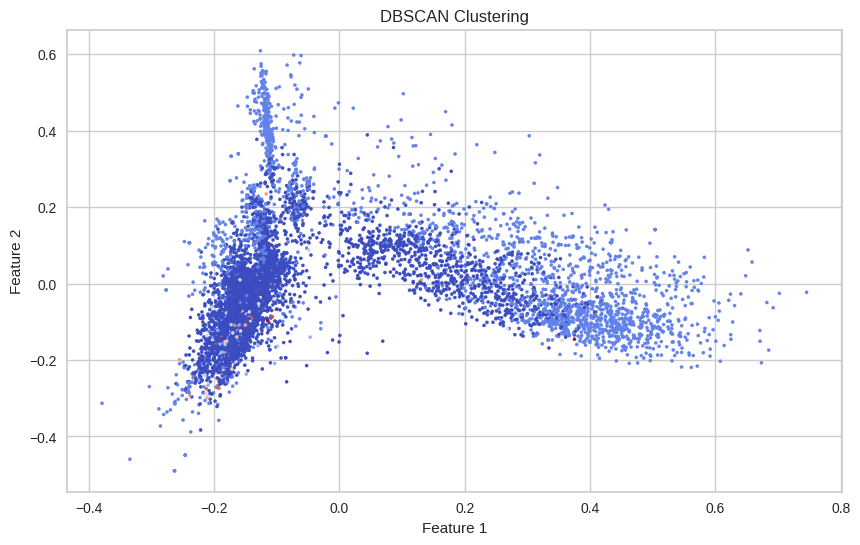

In [87]:
# Visualizing evaluation Metric Score chart
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=ypred, s=5, cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Here we can clearly see two big cluster and two small cluster showing uncertainty or the noise showing not so good result. 

#### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*  Here i have used Silhouette Score which is a popular evaluation metric for clustering algorithms that measures the quality and consistency of clusters. 
---
*  The positive business impact of using the Silhouette Score lies in its ability to assess the quality and usefulness of the clustering results. Here's why it is valuable:

1. Quantifies Cluster Cohesion and Separation: The Silhouette Score considers both the cohesion of data points within a cluster and the separation between different clusters. It takes into account the distances between data points within the same cluster (cohesion) and the distances between data points in different clusters (separation). A higher Silhouette Score indicates well-defined and compact clusters that are distinct from each other, which is beneficial for business analysis.

2. Helps in Assessing Cluster Interpretability: Clusters with higher Silhouette Scores indicate that the data points within each cluster are similar to each other and dissimilar to the data points in other clusters. This leads to more interpretable clusters that capture distinct patterns or groups within the data. Interpretable clusters can provide valuable insights for businesses, such as customer segmentation, product categorization, or anomaly detection.

3. Facilitates Decision-Making: The Silhouette Score provides a single numerical value that quantifies the overall quality of clustering. This makes it easier for businesses to compare and select the best clustering algorithm or parameter settings. It helps in making informed decisions about the number of clusters to choose or which clustering approach to adopt, based on maximizing the Silhouette Score.

4. Supports Iterative Improvement: Businesses can use the Silhouette Score to iteratively improve clustering results. By experimenting with different clustering algorithms, parameter settings, or preprocessing techniques, businesses can compare the Silhouette Scores and choose the approach that yields the highest score. This iterative process helps in refining and optimizing the clustering results for better business insights.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Silhouette Score is a measure of how well-defined the clusters are in a clustering algorithm. A higher Silhouette Score indicates better-defined clusters.

In your case, the Silhouette Score for the hierarchical model is 0.0127, while for the k-means model with hyperparameter optimization, the Silhouette Score for cluster 4 is 0.0547.

Comparing the two scores, the k-means model with hyperparameter optimization has a higher Silhouette Score for cluster 4, indicating better-defined clusters. Therefore, based on the Silhouette Score, the k-means model with hyperparameter optimization would be a better choice for making clusters in this scenario.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 The code generates SHAP values for the data points using the K-means model. It then creates a summary plot using the shap.summary_plot function, which visualizes the feature importance. The plot shows the impact of each feature on the model's predictions. Positive SHAP values indicate features that contribute positively to a higher prediction, while negative SHAP values indicate features that contribute negatively. The magnitude of the SHAP values represents the strength of the feature's influence.

  0%|          | 0/6603 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



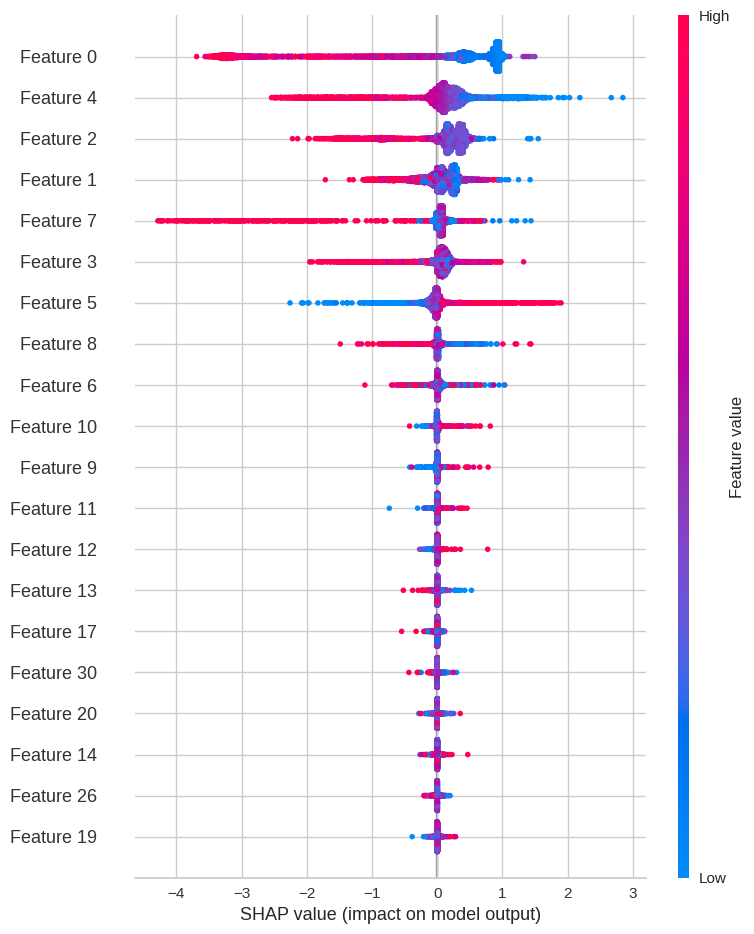

In [103]:
from sklearn.metrics import silhouette_score

plt.rcParams['figure.figsize'] = (10, 6)

# Generate background samples using shap.sample or shap.kmeans
background = shap.sample(x_pca, 50)  
explainer = shap.KernelExplainer(model.predict, background)

# Generate SHAP values for the data points
shap_values = explainer.shap_values(x_pca)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, x_pca)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File  
# Save the best_kmeans model in pickle format
with open('best_kmeans_model.pickle', 'wb') as f:
    pickle.dump(best_kmeans, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

we explored three clustering algorithms, K-means, hierarchical  and DBSCAN clustering, and evaluated the performance of k-means and hierarchical using the silhouette score. The silhouette score measures the compactness and separation of clusters, with higher values indicating better-defined clusters.

For the hierarchical clustering model, the silhouette score was found to be 0.0127, indicating relatively weak cluster separation. On the other hand, the K-means model with 4 clusters achieved a silhouette score of 0.0547, which suggests better-defined clusters compared to hierarchical clustering.
 DBSCAN is not good if there is noise in data, our algorithm gives two very big and two very small clusters which is not a good choice for clustering. 

To further optimize the K-means model, hyperparameter optimization was performed using grid search with the parameter combinations: max_iter=15, n_clusters=4, random_state=10, and tol=0.01. This optimization resulted in a slight improvement in the silhouette score, with a best parameter configuration of max_iter=15, n_clusters=4, random_state=10, and tol=0.01.

Based on these results, we concluded that the K-means clustering algorithm with 4 clusters and the optimized hyperparameters performed better than the hierarchical clustering approach. Therefore, we selected the K-means model as the preferred clustering algorithm for this particular dataset.

### ***Hurrah! I have successfully completed My Machine Learning Capstone Project !!!***